 # Import datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')



imdb.name.basics.csv

In [56]:
imdb_name_basics =pd.read_csv('data/imdb.name.basics.csv')

In [57]:
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [58]:
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv')

ParserError: Error tokenizing data. C error: Expected 25 fields in line 7, saw 28


## first glance at dataset and pre-cleaning of individual dataset

### imdb_title_ratings

In [3]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
imdb_title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [6]:
len(imdb_title_ratings.tconst) != len(set(imdb_title_ratings.tconst))

False

#### imdb_title_ratings looks fine. no duplicate, no missing values

### imdb_title_basics

In [7]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
len(imdb_title_basics.tconst) != len(set(imdb_title_basics.tconst))

False

In [10]:
len(imdb_title_basics['primary_title']) != len(set(imdb_title_basics['primary_title']))

True

There are duplicates in the primary_title column.

In [11]:
# result = imdb_title_basics[imdb_title_basics['primary_title'].\
#                           isin(imdb_title_basics[imdb_title_basics.duplicated(['primary_title'])]['primary_title'])]
# result.sort_values('primary_title')

In [12]:
imdb_title_basics = imdb_title_basics.drop_duplicates(['primary_title'])

In [13]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136071 entries, 0 to 146143
Data columns (total 6 columns):
tconst             136071 non-null object
primary_title      136071 non-null object
original_title     136055 non-null object
start_year         136071 non-null int64
runtime_minutes    106598 non-null float64
genres             131180 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


In [14]:
imdb_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        16
start_year             0
runtime_minutes    29473
genres              4891
dtype: int64

Leave the missing values for later. 

### tn_movie_budgets

In [15]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [17]:
len(tn_movie_budgets['movie']) != len(set(tn_movie_budgets['movie']))

True

In [18]:
tn_movie_budgets = tn_movie_budgets.drop_duplicates(['movie'])

In [19]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
id                   5698 non-null int64
release_date         5698 non-null object
movie                5698 non-null object
production_budget    5698 non-null object
domestic_gross       5698 non-null object
worldwide_gross      5698 non-null object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


#### tn_movie_budgets looks fine, no duplicate, no missing values. 

# Merge datasets

In [20]:
imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='inner')

In [21]:
imdb_joined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [22]:
imdb_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68827 entries, 0 to 68826
Data columns (total 8 columns):
tconst             68827 non-null object
primary_title      68827 non-null object
original_title     68827 non-null object
start_year         68827 non-null int64
runtime_minutes    61670 non-null float64
genres             68065 non-null object
averagerating      68827 non-null float64
numvotes           68827 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.7+ MB


In [23]:
imdb_joined['movie'] = imdb_joined['primary_title']

In [24]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
df = pd.merge(imdb_joined, tn_movie_budgets, on='movie', how='inner')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 14 columns):
tconst               2033 non-null object
primary_title        2033 non-null object
original_title       2033 non-null object
start_year           2033 non-null int64
runtime_minutes      1988 non-null float64
genres               2031 non-null object
averagerating        2033 non-null float64
numvotes             2033 non-null int64
movie                2033 non-null object
id                   2033 non-null int64
release_date         2033 non-null object
production_budget    2033 non-null object
domestic_gross       2033 non-null object
worldwide_gross      2033 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.2+ KB


In [27]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"


# Data cleaning

In [28]:
# change the type of 'release_date' to timedelta
df['release_date'] = pd.to_datetime(df['release_date'])

In [29]:
# get 'release_year'
df['release_year'] = df['release_date'].dt.to_period("Y")

In [30]:
# get 'release_month'
df['release_year_month'] = df['release_date'].dt.to_period("M")

In [31]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,2012-12-31,"$45,000,000",$0,"$73,706",2012,2012-12
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,37,2013-12-25,"$91,000,000","$58,236,838","$187,861,183",2013,2013-12
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,67,2014-09-19,"$28,000,000","$26,017,685","$62,108,587",2014,2014-09


In [32]:
df['duration'] = df['runtime_minutes']
df['budget'] = df['production_budget']

In [33]:
df.drop(['tconst', 'primary_title', 'original_title', 'start_year', 'id', 'runtime_minutes', 'production_budget'], axis = 1, inplace = True)

In [34]:
# rearrange columns
df = df[['movie', 'genres', 'duration',\
         'averagerating', 'numvotes', 'release_date',\
         'release_year', 'release_month_year', 'budget',\
         'domestic_gross', 'worldwide_gross']]

In [35]:
df.head()

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,"$45,000,000",$0,"$73,706"
1,The Overnight,NaN,88.0,7.5,24,2015-06-19,2015,2015-06,"$200,000","$1,109,808","$1,165,996"
2,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,"$25,000,000","$720,828","$9,313,302"
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,2013-12-25,2013,2013-12,"$91,000,000","$58,236,838","$187,861,183"
4,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,2014-09-19,2014,2014-09,"$28,000,000","$26,017,685","$62,108,587"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 11 columns):
movie                 2033 non-null object
genres                2031 non-null object
duration              1988 non-null float64
averagerating         2033 non-null float64
numvotes              2033 non-null int64
release_date          2033 non-null datetime64[ns]
release_year          2033 non-null period[A-DEC]
release_month_year    2033 non-null period[M]
budget                2033 non-null object
domestic_gross        2033 non-null object
worldwide_gross       2033 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 190.6+ KB


In [37]:
# Convert object(production_budget, domestic_gross, and worldwide_gross) to float
df['budget'] = df['budget'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['domestic_gross'] = df['domestic_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))

In [38]:
df.head()

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,45000000.0,0.0,73706.0
1,The Overnight,NaN,88.0,7.5,24,2015-06-19,2015,2015-06,200000.0,1109808.0,1165996.0
2,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,25000000.0,720828.0,9313302.0
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,2013-12-25,2013,2013-12,91000000.0,58236838.0,187861183.0
4,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,2014-09-19,2014,2014-09,28000000.0,26017685.0,62108587.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 11 columns):
movie                 2033 non-null object
genres                2031 non-null object
duration              1988 non-null float64
averagerating         2033 non-null float64
numvotes              2033 non-null int64
release_date          2033 non-null datetime64[ns]
release_year          2033 non-null period[A-DEC]
release_month_year    2033 non-null period[M]
budget                2033 non-null float64
domestic_gross        2033 non-null float64
worldwide_gross       2033 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 190.6+ KB


## Remove all missing values

In [40]:
df = df[~df['duration'].isna()]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2031
Data columns (total 11 columns):
movie                 1988 non-null object
genres                1986 non-null object
duration              1988 non-null float64
averagerating         1988 non-null float64
numvotes              1988 non-null int64
release_date          1988 non-null datetime64[ns]
release_year          1988 non-null period[A-DEC]
release_month_year    1988 non-null period[M]
budget                1988 non-null float64
domestic_gross        1988 non-null float64
worldwide_gross       1988 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 186.4+ KB


In [42]:
df = df[~df['genres'].isna()]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2031
Data columns (total 11 columns):
movie                 1986 non-null object
genres                1986 non-null object
duration              1986 non-null float64
averagerating         1986 non-null float64
numvotes              1986 non-null int64
release_date          1986 non-null datetime64[ns]
release_year          1986 non-null period[A-DEC]
release_month_year    1986 non-null period[M]
budget                1986 non-null float64
domestic_gross        1986 non-null float64
worldwide_gross       1986 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 186.2+ KB


### Dataset cleaned

# Data analysis

### Data correlation

In [44]:
df.corr()

,duration,averagerating,numvotes,budget,domestic_gross,worldwide_gross
duration,1.000000,0.295932,0.435699,0.330956,0.271618,0.283038
averagerating,0.295932,1.000000,0.405692,0.174232,0.243272,0.228692
numvotes,0.435699,0.405692,1.000000,0.534110,0.613867,0.604912
budget,0.330956,0.174232,0.534110,1.000000,0.728983,0.792899
domestic_gross,0.271618,0.243272,0.613867,0.728983,1.000000,0.946653
worldwide_gross,0.283038,0.228692,0.604912,0.792899,0.946653,1.000000


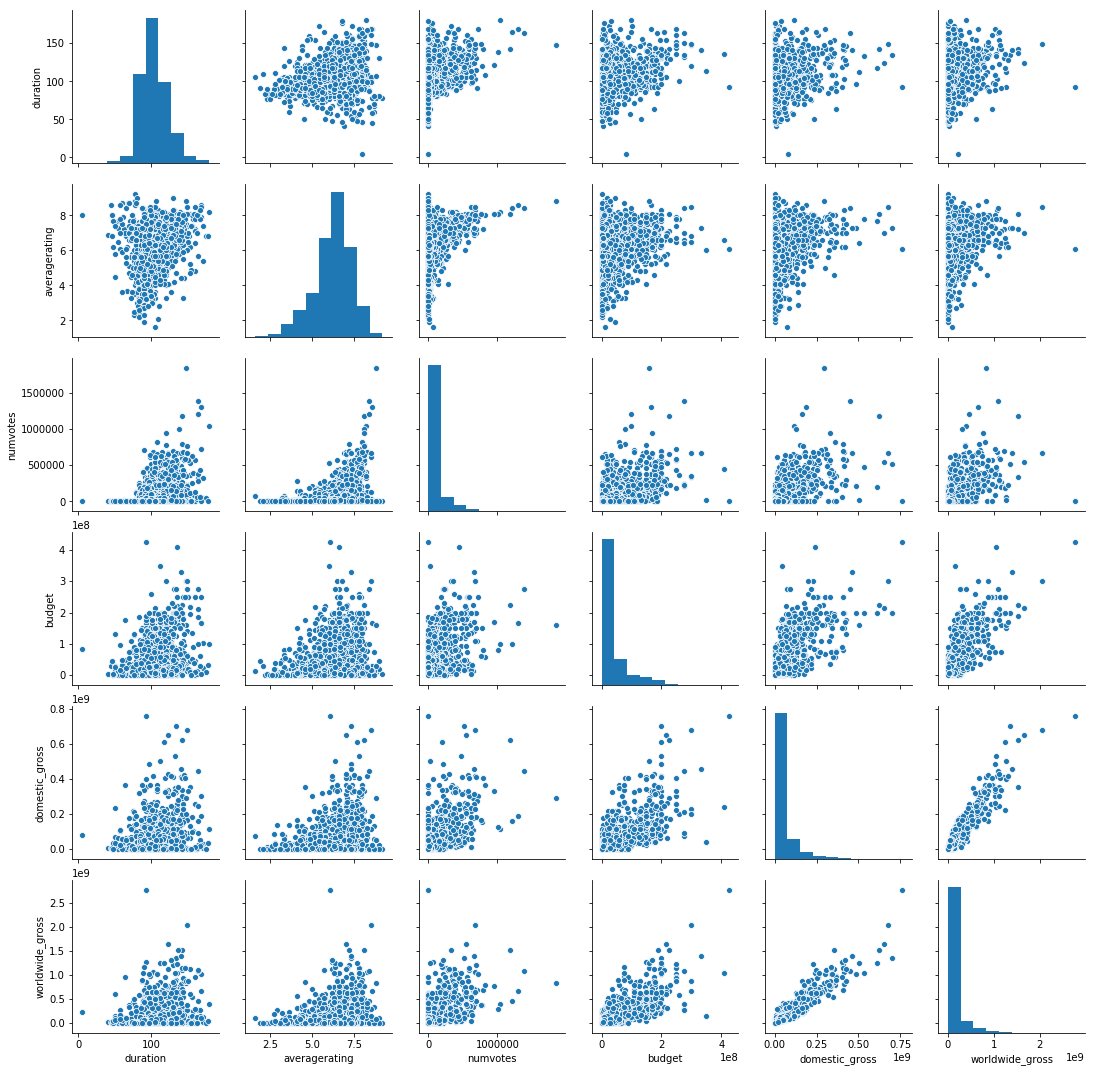

In [45]:
sns.pairplot(df)
plt.show()

### key info: 
1. buget significantly correlated with domestic gross and worldwide gross
2. domestic gross significantly correlated with worldwide gross

## budget to domestic gross and budget to worldwide gross

In [46]:
df.head()

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,45000000.0,0.0,7.370600e+04
2,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,25000000.0,720828.0,9.313302e+06
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,2013-12-25,2013,2013-12,91000000.0,58236838.0,1.878612e+08
4,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,2014-09-19,2014,2014-09,28000000.0,26017685.0,6.210859e+07
5,Jurassic World,"Action,Adventure,Sci-Fi",124.0,7.0,539338,2015-06-12,2015,2015-06,215000000.0,652270625.0,1.648855e+09


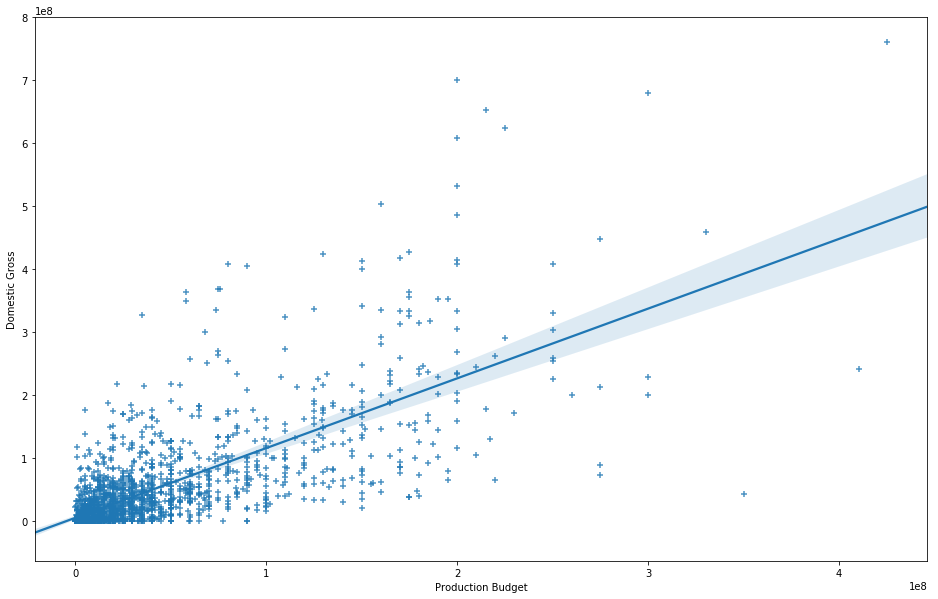

<Figure size 432x288 with 0 Axes>

In [47]:
fig1 = plt.figure(figsize=(16, 10))
plt.plot()

sns.regplot(x=df["budget"], y=df["domestic_gross"], marker = "+")

plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()

fig1.savefig("budget to domestic gross.png")
plt.clf()

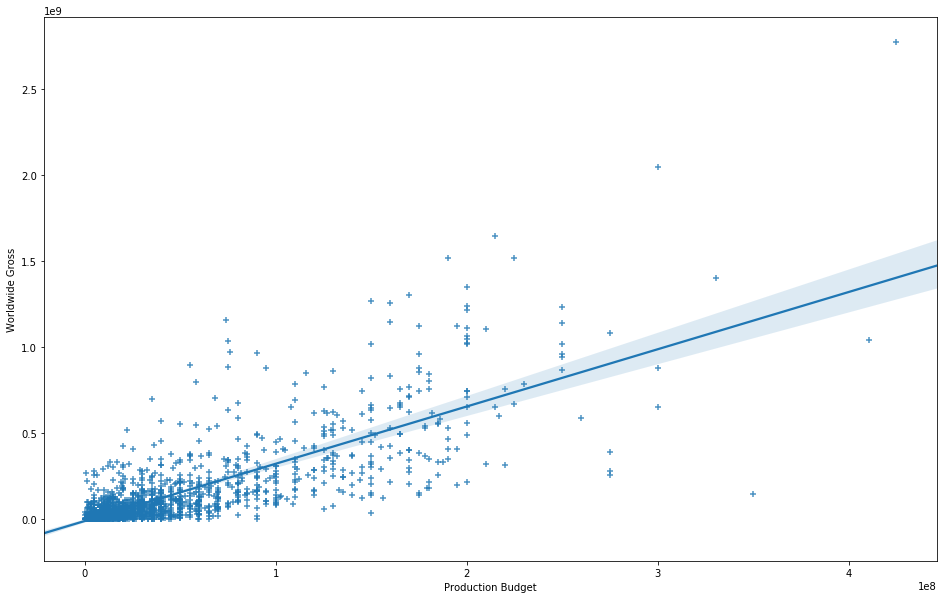

<Figure size 432x288 with 0 Axes>

In [48]:
fig2 = plt.figure(figsize=(16, 10))
plt.plot()

sns.regplot(x=df["budget"], y=df["worldwide_gross"], marker = "+")

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

fig2.savefig("budget to worldwide gross.png")
plt.clf()

## Top ten movies by domestic, worldwide, and domestic and worldwide

In [49]:
top_domestic_gross = df.sort_values(by=['domestic_gross'], ascending = False)

In [50]:
top_domestic_gross.head(10)

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
878,Avatar,Horror,93.0,6.1,43,2009-12-18,2009,2009-12,425000000.0,760507625.0,2.776345e+09
924,Black Panther,"Action,Adventure,Sci-Fi",134.0,7.3,516148,2018-02-16,2018,2018-02,200000000.0,700059566.0,1.348258e+09
1759,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0,8.5,670926,2018-04-27,2018,2018-04,300000000.0,678815482.0,2.048134e+09
5,Jurassic World,"Action,Adventure,Sci-Fi",124.0,7.0,539338,2015-06-12,2015,2015-06,215000000.0,652270625.0,1.648855e+09
92,The Avengers,"Action,Adventure,Sci-Fi",143.0,8.1,1183655,2012-05-04,2012,2012-05,225000000.0,623279547.0,1.517936e+09
1659,Incredibles 2,"Action,Adventure,Animation",118.0,7.7,203510,2018-06-15,2018,2018-06,200000000.0,608581744.0,1.242521e+09
1691,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",133.0,7.8,478592,2016-12-16,2016,2016-12,200000000.0,532177324.0,1.049103e+09
1269,Beauty and the Beast,"Drama,Fantasy,Romance",112.0,6.4,18100,2017-03-17,2017,2017-03,160000000.0,504014165.0,1.259200e+09
1239,Finding Dory,"Adventure,Animation,Comedy",97.0,7.3,213542,2016-06-17,2016,2016-06,200000000.0,486295561.0,1.021215e+09
1325,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",141.0,7.3,665594,2015-05-01,2015,2015-05,330600000.0,459005868.0,1.403014e+09


In [55]:
domestic_gross_top_ten = 

TypeError: '(878     760507625.0
924     700059566.0
1759    678815482.0
5       652270625.0
92      623279547.0
1659    608581744.0
1691    532177324.0
1269    504014165.0
1239    486295561.0
1325    459005868.0
400     448139099.0
1758    426525952.0
1020    424668047.0
1860    417719760.0
17      415004880.0
24      412563408.0
353     408992272.0
1629    408084349.0
434     408010692.0
1244    404508916.0
379     400738009.0
1444    368384330.0
783     368065385.0
1202    364001123.0
484     363070709.0
723     356461711.0
1473    353007020.0
442     352390543.0
1177    350126372.0
1507    341268248.0
1021    337135885.0
1248    336045770.0
527     335061807.0
1227    334201140.0
148     334191110.0
1070    333172112.0
1515    330360194.0
438     327481748.0
426     325100054.0
1910    324591735.0
1600    318604126.0
1631    315058289.0
280     312433331.0
182     304360277.0
108     303003568.0
381     300531751.0
419     292576195.0
57      291045518.0
1022    281723902.0
511     274092705.0
1625    270329045.0
509     268488329.0
1623    264624300.0
119     262030663.0
944     259746958.0
226     258366855.0
544     257784718.0
1264    255119788.0
459     254464305.0
380     251513985.0
1639    248757044.0
1953    246734314.0
1134    245439076.0
641     241407328.0
352     241063875.0
107     238736787.0
268     237282182.0
698     234770996.0
1591    234280354.0
1562    234037575.0
977     233921534.0
1975    233632142.0
254     232641920.0
129     229024295.0
452     228778661.0
1669    228433663.0
532     226277068.0
1823    225764765.0
1222    222527828.0
719     218665740.0
742     217631306.0
106     217581232.0
1880    216648740.0
334     216391482.0
832     216303339.0
879     215288866.0
1697    213767512.0
325     213511408.0
652     210031325.0
1258    209028679.0
1131    208545589.0
1045    206362140.0
972     202853933.0
82      202359711.0
9       200821936.0
87      200676069.0
1309    200074175.0
1249    191719337.0
264     191450875.0
345     191204754.0
1872    190068280.0
874     189412677.0
1968    188024361.0
81      188017894.0
45      187168425.0
562     186848418.0
1479    184296230.0
755     183637894.0
763     182805123.0
19      182207973.0
69      181030624.0
41      180202163.0
454     179020854.0
1364    177784257.0
1104    177397510.0
730     177002924.0
366     176760185.0
29      176654505.0
223     176591618.0
1794    176387405.0
1875    176040665.0
1754    175750384.0
1443    175006930.0
1718    175003033.0
1538    174532921.0
535     174340174.0
891     172558876.0
1874    171958438.0
448     171243005.0
805     171091819.0
510     169705587.0
1378    169700110.0
1855    169607287.0
529     169211718.0
1689    168052812.0
1234    167767189.0
1890    167500092.0
1276    166167230.0
354     165249063.0
2018    163958031.0
1982    163479795.0
67      163214888.0
1242    162994032.0
951     162805434.0
1768    162192920.0
420     162001186.0
767     161321843.0
441     161197785.0
1315    160791800.0
1341    159581587.0
1755    159555901.0
1428    158848340.0
1603    155442489.0
1147    155190832.0
838     155136755.0
777     153707064.0
435     153636354.0
1658    152901115.0
1698    151101803.0
940     150947895.0
823     150394119.0
904     150117807.0
1062    150086800.0
23      149260504.0
128     148438600.0
142     148415853.0
88      148313048.0
1617    146880162.0
326     146408305.0
1847    145443742.0
398     144840419.0
491     143619809.0
1233    143528619.0
36      142614158.0
2010    141186864.0
439     139854287.0
22      139606856.0
289     138447667.0
1427    138141585.0
945     137748063.0
775     137690172.0
513     137400141.0
657     137355633.0
155     136025503.0
841     134508551.0
1075    134506920.0
453     134202565.0
1820    134069511.0
1187    133668525.0
684     133107389.0
477     132556852.0
1387    132422809.0
169     132092958.0
113     131772187.0
1297    131538435.0
1354    130178411.0
1599    130168683.0
343     128350574.0
1469    128261724.0
210     128012934.0
1179    128002372.0
543     127440871.0
282     127352707.0
1839    127195589.0
738     127004179.0
1893    126813153.0
110     126643061.0
1488    126573960.0
504     126477084.0
190     125095601.0
1574    125070033.0
672     125014030.0
26      124987022.0
1407    124872350.0
918     124107476.0
236     123477607.0
1042    123087120.0
636     122523060.0
2022    121945720.0
1735    121248145.0
1051    119793567.0
425     119219978.0
115     118311368.0
769     117723989.0
551     117538559.0
1532    117235147.0
200     117229692.0
140     116900694.0
385     116632095.0
212     116601172.0
1967    115715889.0
1883    115234093.0
1646    115108515.0
2012    114968774.0
1799    114434010.0
1715    113883318.0
1437    113746621.0
996     113721571.0
1999    113330342.0
1829    113257297.0
238     113203870.0
96      111506430.0
84      110485654.0
1553    110212700.0
709     109767581.0
1782    108638745.0
1053    108235497.0
460     108085305.0
1720    107825862.0
93      107518682.0
1050    107509366.0
582     107136417.0
117     106954678.0
1830    106593296.0
310     106580051.0
121     105487148.0
1845    104897530.0
133     104386950.0
881     104028807.0
440     103860290.0
73      103804407.0
503     103412758.0
703     103144286.0
369     103068524.0
1609    102826543.0
1429    102797000.0
621     102515793.0
892     102427862.0
1886    102092201.0
1695    102084362.0
757     101802906.0
28      101530738.0
1290    101157447.0
1207    101028233.0
614     100920329.0
1386    100546139.0
285     100539043.0
691     100478608.0
1801    100407760.0
338     100292856.0
355     100246011.0
1827    100234838.0
708     100206256.0
405     100014699.0
1813     99215042.0
1255     98927592.0
138      98780042.0
335      98711404.0
797      97670358.0
340      96962694.0
893      95720716.0
318      95347692.0
25       95020213.0
1751     94999143.0
164      94835059.0
991      93772375.0
125      93617009.0
1217     93589701.0
1027     93436322.0
1340     93432655.0
581      93050117.0
90       92186262.0
1102     92115211.0
957      92054159.0
1076     91742160.0
694      91547205.0
1114     91125143.0
1484     90862685.0
1398     90411453.0
253      89302115.0
1352     89256424.0
533      89107235.0
77       88768303.0
245      88625922.0
950      87044645.0
894      86907746.0
1155     86260045.0
1121     86208010.0
1859     86089513.0
922      85911262.0
1513     85886987.0
1445     85817906.0
18       85710210.0
1690     85576941.0
15       85463309.0
1683     85364450.0
1709     85160248.0
1988     85080171.0
866      85028192.0
586      84752907.0
1130     84525432.0
1611     84410380.0
1590     84273813.0
1192     83911193.0
731      83670083.0
311      83504017.0
1973     83482352.0
994      83350911.0
1655     83320000.0
1154     83299761.0
1958     83240103.0
960      83028130.0
161      82624961.0
1724     82051601.0
1964     81903458.0
1737     81697192.0
39       81562942.0
481      81526121.0
1417     81476385.0
1881     81159365.0
1277     81001787.0
100      80574010.0
273      80360866.0
1501     80172128.0
1289     80101125.0
65       80070736.0
171      80069458.0
136      80014842.0
622      79883359.0
1633     79817937.0
184      79727149.0
269      79249455.0
1750     79042440.0
759      78765986.0
35       78046570.0
1175     78031620.0
134      77591831.0
1919     77339130.0
170      77267296.0
13       77222099.0
1400     77042381.0
146      76423035.0
198      76223578.0
1904     76118990.0
658      75658097.0
429      75624550.0
327      75612460.0
252      75605492.0
1318     75395035.0
1267     74262031.0
75       74158157.0
1117     73921000.0
127      73864507.0
1282     73103784.0
10       73058679.0
12       73026337.0
800      73013910.0
2005     72708161.0
321      72688614.0
1822     72679278.0
1673     72313754.0
615      72286779.0
1969     72110659.0
231      72082999.0
909      71628180.0
1514     71562550.0
799      71399120.0
1790     71309760.0
1616     71091594.0
1071     71017784.0
456      70662220.0
1112     70525195.0
655      70259870.0
1654     70052444.0
647      70012847.0
415      69688384.0
1952     69488745.0
1800     68671925.0
1841     68566296.0
953      68559554.0
1569     68525609.0
1934     68420120.0
1585     68261644.0
1706     67790117.0
1931     67745330.0
302      67631157.0
2008     67363237.0
671      67349198.0
1140     67209615.0
166      67061228.0
794      66954149.0
1159     66711892.0
569      66528000.0
333      66486205.0
1481     66432867.0
642      66380662.0
1235     66013057.0
1470     65532576.0
1381     65328121.0
495      65233400.0
670      65206105.0
402      65187603.0
1544     65075540.0
1216     65028687.0
574      65014513.0
733      65011757.0
1047     65001093.0
766      64935167.0
806      64575175.0
1184     64473115.0
103      64460211.0
917      64251538.0
1199     64172251.0
1613     64063008.0
967      64062587.0
445      64006466.0
241      64003625.0
1357     63939454.0
246      63914167.0
1917     63859435.0
1882     63795655.0
444      63686397.0
583      63536011.0
124      63150991.0
1440     63077560.0
230      63075011.0
348      62950384.0
406      62575678.0
1583     62524260.0
423      62495645.0
60       62189884.0
836      61737191.0
1775     61705123.0
961      61433527.0
1939     61363304.0
1086     61308153.0
275      61153526.0
437      61002302.0
676      60652036.0
913      60522097.0
382      60457138.0
1802     60323786.0
1384     60311495.0
272      60128566.0
433      60095852.0
74       60022256.0
1764     60008303.0
1395     59874525.0
910      59700064.0
156      59699513.0
1693     59689605.0
729      59650222.0
1237     59623958.0
1524     59281555.0
1240     59076019.0
571      58884188.0
427      58877969.0
1707     58715510.0
176      58709717.0
1605     58697076.0
293      58607007.0
337      58401464.0
554      58269151.0
409      58250803.0
3        58236838.0
1066     58183966.0
522      58060186.0
235      58009200.0
1951     57924679.0
1854     57891803.0
214      57744720.0
1430     57682904.0
1099     57342725.0
1716     57027435.0
669      56758835.0
1078     56671993.0
1809     56443120.0
1390     56441711.0
1431     56245075.0
555      56117548.0
699      56003051.0
86       55991880.0
710      55802754.0
693      55750480.0
476      55703475.0
1899     55683845.0
270      55675313.0
1677     55483770.0
1796     55340730.0
1738     55121623.0
1913     54858851.0
811      54767494.0
654      54760791.0
715      54731865.0
1032     54730625.0
89       54724696.0
116      54712227.0
2011     54611903.0
1873     54513740.0
1167     54445357.0
656      54333290.0
342      54239856.0
1519     54235441.0
1621     54117416.0
1666     54030051.0
646      54009150.0
1133     53900335.0
1312     53862963.0
1991     53548586.0
2016     53458319.0
174      53374681.0
889      53345287.0
1877     53302314.0
609      53262945.0
919      53262560.0
927      53059911.0
105      53032453.0
737      52698535.0
1068     52543632.0
901      52421953.0
1941     52302978.0
2023     52287414.0
153      52076908.0
474      52000688.0
993      51872378.0
519      51853450.0
178      51802742.0
180      51774002.0
663      51580136.0
1342     51573925.0
1643     51342000.0
1243     51178893.0
1554     51100486.0
1703     51024708.0
247      50856010.0
61       50837305.0
735      50701325.0
1944     50621733.0
248      50577412.0
403      50474843.0
613      50316123.0
286      50269859.0
2020     50255310.0
1602     50159144.0
1229     50151543.0
1876     50065850.0
47       49876377.0
1043     49875291.0
2004     49275340.0
14       49130588.0
1074     49008662.0
1864     48958273.0
1984     48795601.0
926      48637684.0
633      48475290.0
1004     48086903.0
308      48071303.0
1781     48023088.0
1626     47836282.0
1733     47695371.0
792      47546796.0
687      47482519.0
157      47425125.0
925      47326473.0
681      47323100.0
71       47225655.0
973      47119388.0
196      47059963.0
845      47047013.0
1606     46889293.0
1489     46874505.0
1997     46840590.0
1924     46697321.0
478      46462469.0
461      46383639.0
189      46290741.0
1475     46009673.0
376      46000903.0
463      45819713.0
1974     45729221.0
849      45512466.0
734      45290318.0
1972     45216793.0
1084     45157105.0
16       45090374.0
44       45060734.0
988      45055776.0
1327     45020282.0
1401     45018541.0
1295     44983704.0
317      44947622.0
262      44936545.0
760      44922302.0
347      44898413.0
424      44875481.0
292      44806783.0
1211     44672764.0
745      44667095.0
1122     44480275.0
7        44338224.0
1168     44137712.0
2013     44069456.0
653      43853424.0
341      43585753.0
1305     43568507.0
1948     43549096.0
1448     43482270.0
276      43313890.0
1253     43242871.0
1497     43037835.0
1642     43035725.0
1063     43034523.0
102      42930462.0
1909     42872467.0
370      42779261.0
1979     42762350.0
1541     42754105.0
372      42739347.0
1713     42725475.0
744      42629776.0
696      42587643.0
2003     42469946.0
887      42402632.0
237      42400223.0
955      42345531.0
1399     42340598.0
316      42073277.0
1826     42065185.0
457      42025135.0
1516     42024533.0
1843     41596251.0
1146     41411015.0
1954     41263140.0
639      41152203.0
368      41034350.0
1218     41012075.0
954      41003371.0
203      40962534.0
1272     40934175.0
1815     40847995.0
1888     40826341.0
271      40563557.0
1215     40479370.0
139      40259119.0
165      40168080.0
1667     40098064.0
1221     40041683.0
58       39868642.0
1228     39687694.0
207      39440655.0
1279     39322544.0
1148     39282227.0
1035     39175066.0
27       39123589.0
49       39046489.0
1183     38934842.0
873      38583626.0
1023     38543473.0
394      38518613.0
393      38362475.0
1311     38322743.0
1780     38311134.0
319      38180928.0
1596     38052832.0
822      37948765.0
520      37915414.0
1260     37880356.0
377      37738810.0
450      37729698.0
1348     37709979.0
536      37662162.0
717      37553932.0
678      37519139.0
260      37490007.0
1452     37446117.0
192      37412945.0
261      37397291.0
685      37306030.0
320      37300107.0
722      37295394.0
541      37243418.0
790      37134215.0
695      37053924.0
1509     37017955.0
287      36931089.0
834      36918811.0
94       36880033.0
749      36665854.0
761      36661504.0
732      36447959.0
131      36392502.0
645      36343858.0
1700     36299670.0
1985     36276286.0
1701     36261763.0
1025     36249674.0
1810     36108758.0
1955     36020063.0
1559     36006065.0
1518     35893537.0
1141     35851379.0
976      35841901.0
1351     35819556.0
840      35818913.0
1744     35811509.0
1113     35763137.0
635      35608245.0
498      35606376.0
959      35593113.0
118      35497337.0
1987     35418723.0
218      35287788.0
1011     35266619.0
1787     35144505.0
877      35095904.0
1592     35088320.0
907      35074677.0
1426     35073978.0
322      35061031.0
59       35060689.0
1885     35017297.0
359      35016118.0
1259     34912982.0
1891     34729091.0
872      34636443.0
1511     34580201.0
1468     34562222.0
1252     34531832.0
706      34522221.0
686      34469210.0
683      34393507.0
1879     34366783.0
351      34353000.0
629      34341945.0
1871     34121140.0
215      34017028.0
1671     33987757.0
1046     33700160.0
1566     33685268.0
929      33680992.0
364      33679655.0
436      33644788.0
66       33618855.0
1281     33404871.0
1858     33395426.0
1533     33370166.0
1339     33307793.0
1394     33078266.0
224      33047633.0
390      33035397.0
312      32908290.0
1681     32789645.0
258      32746941.0
1466     32732301.0
1993     32522352.0
1361     32462372.0
1486     32381218.0
771      32363404.0
1410     32244051.0
1608     32187017.0
1094     32172757.0
1850     32149404.0
1929     32138862.0
1213     32051917.0
1637     32011576.0
78       32010860.0
1663     32000304.0
1811     31886361.0
1795     31841299.0
634      31611916.0
923      31569268.0
903      31559560.0
494      31206263.0
277      31177548.0
587      31165421.0
1338     31153464.0
1393     31090320.0
482      31051126.0
1835     31016021.0
208      31011732.0
1862     31011616.0
810      30932113.0
1170     30697999.0
1317     30659817.0
949      30628981.0
1308     30577122.0
1360     30569935.0
313      30568743.0
1926     30564825.0
411      30542576.0
2015     30376755.0
1682     30353973.0
1314     30306268.0
628      30272254.0
1152     30202860.0
1994     30199105.0
391      30157016.0
1224     30127963.0
38       30080225.0
1377     30063805.0
1915     30014534.0
144      29959436.0
752      29807260.0
430      29747603.0
1916     29719483.0
229      29499394.0
85       29136626.0
37       29121498.0
675      28848693.0
1200     28842237.0
739      28795985.0
1097     28782481.0
240      28700285.0
1628     28370522.0
661      28087155.0
2019     28051045.0
220      27865571.0
1867     27854931.0
53       27793018.0
1907     27778642.0
104      27758465.0
1458     27740955.0
1321     27695246.0
1079     27569558.0
1286     27467564.0
1756     27383770.0
689      27367660.0
1433     27362712.0
64       27298285.0
885      27288872.0
413      27108272.0
1142     27020284.0
1405     27007844.0
1041     26947624.0
1853     26900336.0
1408     26844692.0
1664     26839498.0
1036     26766213.0
508      26692846.0
564      26623701.0
542      26594261.0
135      26593646.0
1190     26461644.0
659      26414527.0
1420     26410477.0
1241     26302731.0
52       26167002.0
905      26068955.0
4        26017685.0
263      26004851.0
1382     25928550.0
266      25918920.0
812      25888412.0
1499     25801570.0
466      25702053.0
1026     25584504.0
902      25568251.0
34       25440971.0
175      25379975.0
1197     25326071.0
1463     25317379.0
1776     25138705.0
256      25135965.0
1769     25126214.0
507      25124986.0
181      25091816.0
431      25020758.0
1332     25018119.0
32       25003155.0
42       24827228.0
718      24814830.0
132      24719879.0
1834     24622687.0
1205     24477704.0
428      24449754.0
339      24431472.0
975      24397469.0
330      24307106.0
395      24149393.0
1111     24103594.0
324      24046682.0
1805     24004833.0
1675     23998226.0
1411     23894000.0
43       23591432.0
1833     23591043.0
1576     23483357.0
1271     23438250.0
1582     23364784.0
487      23240020.0
101      23209310.0
177      23186769.0
999      23169033.0
1645     23083334.0
1191     23022309.0
455      22852487.0
1261     22764410.0
1989     22730924.0
1725     22673340.0
63       22537881.0
1753     22486409.0
1434     22467450.0
1940     22455510.0
1732     22395806.0
1349     22348241.0
1588     22231658.0
1851     22105643.0
898      22006296.0
1749     21995263.0
1397     21858070.0
1006     21819348.0
864      21750000.0
298      21596445.0
1009     21590086.0
1696     21587519.0
1491     21571189.0
227      21569509.0
1522     21541218.0
451      21540363.0
828      21502690.0
79       21488481.0
194      21443494.0
616      21416355.0
914      21403519.0
358      21392758.0
80       21295021.0
2001     21226204.0
1640     21218403.0
1705     21158188.0
514      21148651.0
1638     21120616.0
303      21052030.0
1572     20919166.0
1971     20868638.0
91       20811365.0
204      20810036.0
588      20777061.0
1946     20738724.0
387      20733485.0
1757     20591853.0
1198     20534907.0
1143     20497844.0
479      20396829.0
559      20377913.0
597      20275446.0
552      20268825.0
1762     20264436.0
11       20257000.0
357      20255281.0
603      20218921.0
844      20180155.0
1266     20158492.0
480      20157300.0
1868     20007149.0
1064     19910002.0
1017     19894664.0
980      19719930.0
296      19701164.0
162      19490041.0
1568     19480739.0
606      19452138.0
1302     19316646.0
1679     19294901.0
468      19075290.0
449      19068240.0
736      19019882.0
1857     18985794.0
556      18942396.0
711      18877153.0
168      18848538.0
1219     18826490.0
1095     18704596.0
1587     18656400.0
619      18620000.0
952      18494006.0
54       18450127.0
501      18388357.0
488      18344729.0
1704     18340051.0
592      18335230.0
493      18298649.0
1359     18297124.0
1057     18119640.0
839      18115927.0
2031     18107621.0
912      18007317.0
1927     17985000.0
1540     17951431.0
1981     17839115.0
378      17804299.0
1980     17804273.0
1108     17766658.0
751      17742948.0
202      17725785.0
869      17686929.0
916      17654912.0
51       17630465.0
989      17616641.0
1323     17550872.0
2007     17547999.0
1712     17506470.0
1029     17501244.0
1925     17493096.0
1316     17418667.0
1193     17390770.0
1477     17329487.0
1034     17237855.0
747      17142080.0
651      17062499.0
109      16999934.0
1188     16973715.0
1478     16809014.0
1986     16790790.0
958      16684352.0
984      16535005.0
1970     16521410.0
604      16468499.0
1752     16376066.0
701      16311571.0
607      16247159.0
1015     16170632.0
1296     16131410.0
1280     16098998.0
1505     16029670.0
537      16008272.0
626      15951040.0
1767     15861566.0
1457     15821461.0
186      15789389.0
1897     15712072.0
315      15634090.0
217      15541549.0
404      15436808.0
492      15325127.0
1189     15323921.0
1083     15179303.0
1356     15160801.0
833      15051977.0
1634     15032800.0
1007     15024049.0
992      14998027.0
863      14945541.0
1995     14915773.0
1804     14856291.0
1932     14836174.0
97       14744435.0
1557     14677674.0
1570     14674077.0
1546     14618727.0
743      14597405.0
206      14482031.0
1586     14439985.0
979      14431633.0
1765     14394097.0
1368     14334645.0
648      14326865.0
1901     14301505.0
1129     14124286.0
55       14011084.0
1836     13985117.0
690      13960394.0
172      13942007.0
612      13843771.0
30       13757804.0
159      13749300.0
346      13657115.0
1374     13651946.0
1990     13539710.0
399      13414714.0
1031     13371528.0
40       13305665.0
1088     13248209.0
6        13109815.0
1406     13092006.0
1739     12985600.0
1145     12795746.0
1230     12786053.0
867      12739737.0
1109     12712093.0
1333     12711491.0
1745     12695691.0
813      12639297.0
1821     12638526.0
1772     12600000.0
1389     12545979.0
897      12512862.0
304      12482741.0
818      12431792.0
1878     12391761.0
1418     12314651.0
786      12241072.0
1067     12227722.0
784      12178602.0
281      12134935.0
599      12050299.0
1694     11989328.0
1977     11977130.0
1945     11962712.0
1000     11862398.0
1832     11686940.0
1089     11614954.0
126      11538204.0
1127     11532774.0
130      11497497.0
941      11494838.0
249      11330849.0
1818     11242801.0
1060     11107431.0
1471     11008770.0
417      10907291.0
1128     10895295.0
1581     10763520.0
978      10753574.0
662      10724389.0
553      10721033.0
1380     10664749.0
1808     10663357.0
1807     10571408.0
183      10547117.0
846      10508518.0
1165     10501938.0
1049     10400000.0
617      10397365.0
1299     10378555.0
1838     10359006.0
141      10324441.0
1852     10205616.0
1578     10169202.0
185      10166820.0
1162     10161183.0
668      10130219.0
1090     10103647.0
1896     10051659.0
1687     10021175.0
1920     10020081.0
1100     10000000.0
201       9737892.0
848       9659074.0
1726      9496130.0
361       9489829.0
1575      9482579.0
1294      9479390.0
985       9427026.0
1474      9420546.0
754       9409538.0
1529      9252038.0
1902      9208876.0
804       9204489.0
1622      9196278.0
796       9177065.0
1766      9097072.0
549       9012000.0
579       8888355.0
1786      8874389.0
1844      8866745.0
388       8840453.0
1817      8803865.0
259       8574339.0
524       8525600.0
713       8406711.0
843       8330720.0
1257      8323085.0
1840      8267544.0
1717      8178001.0
490       8123860.0
895       8110975.0
1194      8110621.0
931       8031955.0
1061      8008161.0
1446      8005980.0
862       7919574.0
1723      7885294.0
1166      7779614.0
1490      7712114.0
1371      7710234.0
1059      7706436.0
1528      7696134.0
1998      7690044.0
278       7634767.0
1119      7597898.0
896       7582065.0
472       7502560.0
384       7468936.0
464       7388654.0
505       7316658.0
173       7204138.0
1334      7192291.0
1936      7123919.0
48        7100177.0
360       7078738.0
475       7018188.0
1692      7006708.0
1149      7000000.0
831       6982680.0
76        6928068.0
1449      6901965.0
1404      6900335.0
1601      6864016.0
528       6861102.0
314       6857096.0
814       6852971.0
852       6810754.0
305       6797696.0
1403      6758416.0
1884      6755271.0
666       6738954.0
1415      6738000.0
1409      6730578.0
1938      6708137.0
860       6670765.0
443       6531503.0
911       6485961.0
143       6469813.0
284       6423605.0
72        6363628.0
2024      6352306.0
410       6179955.0
1906      6115824.0
575       6096582.0
1930      6069605.0
1731      6047363.0
705       6002756.0
965       6002451.0
712       6000000.0
1943      5958315.0
798       5909483.0
1922      5904366.0
1604      5835247.0
1831      5802208.0
578       5790894.0
1038      5775076.0
1503      5749134.0
1209      5718096.0
625       5702083.0
618       5669081.0
160       5666340.0
871       5637066.0
673       5580479.0
590       5359774.0
821       5355847.0
682       5353586.0
970       5310554.0
627       5284309.0
1771      5274005.0
716       5241315.0
1837      5205471.0
225       5101237.0
692       5083906.0
1976      5059608.0
489       4936819.0
1784      4816142.0
1567      4799774.0
884       4712792.0
1531      4702420.0
1746      4601043.0
2009      4600000.0
807       4563029.0
1028      4501094.0
2026      4485485.0
567       4463292.0
1096      4438438.0
1212      4404154.0
1001      4365455.0
728       4311834.0
908       4286367.0
643       4269426.0
1803      4267219.0
1293      4231500.0
1220      4221341.0
1517      4212494.0
1719      4211129.0
1734      4210454.0
1523      4200117.0
1346      4167493.0
888       4100000.0
1825      4073448.0
1619      4068087.0
1291      4067398.0
99        4033574.0
963       4010957.0
824       4002293.0
1362      3958546.0
1812      3930990.0
1014      3915251.0
62        3877922.0
1176      3827466.0
1447      3827060.0
526       3818664.0
412       3763583.0
1330      3759286.0
1238      3759078.0
1612      3740823.0
1422      3712282.0
830       3703046.0
462       3614896.0
1699      3591417.0
1485      3591299.0
151       3573673.0
1887      3511417.0
1806      3500605.0
1661      3498695.0
859       3491669.0
1651      3484331.0
1947      3448256.0
1171      3419967.0
858       3395391.0
1957      3347411.0
1461      3322127.0
1055      3317468.0
1482      3275585.0
936       3254172.0
233       3247816.0
826       3242457.0
1741      3220371.0
486       3205706.0
1865      3143056.0
1150      3134509.0
1456      3128941.0
1598      3127773.0
1494      3122616.0
932       3075255.0
1923      3073392.0
1921      3072605.0
1900      3054285.0
1172      3047539.0
573       3030848.0
1556      3020665.0
664       3014696.0
1649      3000342.0
499       2981038.0
243       2956339.0
768       2859955.0
966       2850357.0
517       2848587.0
1535      2804874.0
1620      2746453.0
577       2712131.0
1385      2703296.0
56        2672413.0
500       2614251.0
344       2595644.0
795       2583301.0
788       2546747.0
458       2529395.0
1292      2507159.0
306       2483790.0
163       2483472.0
1846      2468683.0
50        2455635.0
770       2450867.0
265       2450846.0
389       2434652.0
593       2430735.0
1326      2429989.0
1303      2423467.0
1263      2408553.0
2000      2386254.0
199       2322593.0
1863      2303792.0
152       2283291.0
968       2274649.0
1684      2246000.0
112       2229058.0
1662      2184640.0
1892      2141423.0
1961      2062406.0
239       2039869.0
1496      2022115.0
1019      2013456.0
68        2001124.0
1508      2000093.0
882       2000000.0
589       2000000.0
545       1930282.0
502       1822250.0
1534      1821983.0
473       1810078.0
512       1803064.0
1761      1799322.0
470       1785645.0
570       1784763.0
601       1759252.0
83        1755212.0
301       1738692.0
773       1728953.0
779       1703125.0
244       1685269.0
1560      1661464.0
748       1658706.0
1627      1641825.0
1722      1638202.0
1454      1632000.0
847       1597486.0
1962      1594798.0
1996      1533324.0
1153      1513793.0
1558      1477002.0
222       1475746.0
727       1430241.0
1438      1370646.0
323       1361512.0
803       1361045.0
591       1348205.0
1037      1333124.0
598       1321194.0
145       1311213.0
827       1291645.0
1432      1279681.0
149       1224330.0
1869      1214525.0
1391      1190018.0
467       1188194.0
147       1186538.0
630       1183658.0
837       1165881.0
1903      1163056.0
1039      1131261.0
1918      1115313.0
1174      1109660.0
883       1109276.0
1288      1109199.0
414       1095369.0
880       1069454.0
365       1069334.0
98        1065429.0
518       1044143.0
362       1044039.0
1003      1034589.0
530       1024175.0
1889      1017107.0
1789      1009819.0
764       1007535.0
565        977772.0
374        970816.0
1275       950792.0
780        881824.0
829        871577.0
1467       851690.0
1728       845464.0
610        841056.0
1963       800148.0
835        793352.0
1708       779820.0
1416       779137.0
665        775849.0
1366       767732.0
758        754301.0
2          720828.0
373        707391.0
721        703372.0
2006       700261.0
548        677200.0
1848       676698.0
1435       669688.0
1685       663247.0
2030       655538.0
1287       641439.0
1105       641054.0
793        636706.0
1714       615816.0
558        611709.0
1495       600896.0
857        595018.0
1914       592014.0
228        582024.0
294        568662.0
688        564489.0
1561       557241.0
432        549632.0
1256       549185.0
750        546201.0
640        538690.0
1680       538460.0
356        531806.0
1081       528731.0
1331       523511.0
1549       510957.0
948        501752.0
1652       490973.0
1307       486919.0
815        484592.0
1573       478595.0
497        467602.0
855        463730.0
421        458054.0
781        454121.0
408        453377.0
644        450594.0
997        446770.0
195        442638.0
608        433588.0
1487       419428.0
211        408159.0
851        408015.0
1367       406216.0
1935       396035.0
624        391674.0
1320       391611.0
1164       385422.0
939        385069.0
446        382946.0
1313       373375.0
1232       343706.0
1492       336472.0
782        331000.0
561        327716.0
1965       325491.0
1571       321910.0
1033       319285.0
396        310007.0
2028       307631.0
1525       304602.0
1106       295493.0
746        289773.0
1300       288757.0
1442       288751.0
331        277943.0
1115       274299.0
1814       260441.0
1298       258384.0
981        255000.0
808        254683.0
329        252676.0
1748       248795.0
1949       246305.0
525        237301.0
255        236806.0
1329       231738.0
290        229653.0
1274       222098.0
120        217277.0
1937       212285.0
956        201436.0
704        200558.0
1379       195792.0
167        195459.0
983        187112.0
611        184705.0
1536       182695.0
753        176988.0
1044       176847.0
1392       173472.0
1185       171962.0
1773       166425.0
637        164247.0
550        163753.0
1539       162605.0
1335       155271.0
234        152857.0
1424       152449.0
1774       150191.0
1363       147299.0
1777       144822.0
307        139034.0
205        137885.0
1702       134552.0
674        134109.0
1493       132270.0
2002       131719.0
154        123570.0
576        120016.0
1543       113169.0
251        109383.0
295        109338.0
418        102118.0
221        101270.0
232        100915.0
680        100370.0
534        100280.0
990         96734.0
416         95933.0
971         94596.0
1959        93388.0
300         93051.0
1660        82703.0
1950        79123.0
336         78948.0
650         78396.0
1414        72277.0
915         70958.0
1169        67665.0
1138        67657.0
765         66351.0
1402        65108.0
1615        64148.0
1577        63014.0
600         61847.0
563         59774.0
1247        59671.0
1322        59424.0
580         56491.0
899         56001.0
1589        55039.0
1370        53086.0
850         49521.0
392         48764.0
33          47185.0
193         46425.0
1304        45431.0
1093        42557.0
363         39475.0
20          37151.0
401         36686.0
1657        36336.0
1650        35688.0
521         33245.0
1182        32251.0
825         30905.0
584         30680.0
523         29384.0
1870        29233.0
890         29063.0
309         28468.0
1085        26608.0
95          26345.0
1498        24956.0
809         24084.0
560         20778.0
1530        20056.0
1343        18823.0
585         18000.0
660         17639.0
1345        17503.0
538         17479.0
1278        17472.0
1978        17396.0
861         17061.0
1101        17000.0
772         16816.0
1156        15600.0
1550        15156.0
875         15091.0
1618        14616.0
1173        13486.0
853         12636.0
1251        11774.0
1983        10452.0
209         10024.0
496         10011.0
1521         9837.0
1098         9134.0
820          9120.0
1460         9111.0
1555         8799.0
1856         8708.0
1798         8374.0
605          8297.0
566          7556.0
868          7396.0
1010         6997.0
150          6870.0
1770         5858.0
974          4917.0
982          4584.0
946          4327.0
1551         4091.0
1579         4055.0
1048         3709.0
1284         3648.0
817          3632.0
299          3496.0
594          3361.0
1355         3330.0
1018         3301.0
1265         3256.0
1206         3200.0
1203         3080.0
1451         2636.0
920          2602.0
854          2436.0
1223         1822.0
964          1778.0
986          1711.0
531          1632.0
632          1242.0
1472          918.0
1455          728.0
1502          528.0
1563          388.0
1966            0.0
1849            0.0
1792            0.0
1791            0.0
1861            0.0
1778            0.0
1785            0.0
1763            0.0
1797            0.0
1842            0.0
1788            0.0
1956            0.0
1942            0.0
1911            0.0
2014            0.0
2021            0.0
1824            0.0
1783            0.0
1908            0.0
1816            0.0
1992            0.0
2017            0.0
1793            0.0
0               0.0
1760            0.0
789             0.0
921             0.0
906             0.0
900             0.0
886             0.0
876             0.0
870             0.0
865             0.0
856             0.0
842             0.0
816             0.0
802             0.0
801             0.0
791             0.0
787             0.0
930             0.0
785             0.0
778             0.0
776             0.0
774             0.0
762             0.0
756             0.0
741             0.0
740             0.0
726             0.0
725             0.0
724             0.0
720             0.0
707             0.0
928             0.0
933             0.0
1110            0.0
1052            0.0
1103            0.0
1092            0.0
1091            0.0
1087            0.0
1082            0.0
1077            0.0
1073            0.0
1072            0.0
1069            0.0
1065            0.0
1058            0.0
1056            0.0
1054            0.0
1040            0.0
935             0.0
1024            0.0
1016            0.0
1013            0.0
1012            0.0
1005            0.0
1002            0.0
995             0.0
987             0.0
962             0.0
947             0.0
942             0.0
938             0.0
937             0.0
700             0.0
697             0.0
679             0.0
216             0.0
350             0.0
349             0.0
332             0.0
328             0.0
297             0.0
291             0.0
288             0.0
279             0.0
274             0.0
267             0.0
257             0.0
242             0.0
219             0.0
213             0.0
677             0.0
197             0.0
188             0.0
179             0.0
137             0.0
123             0.0
122             0.0
114             0.0
111             0.0
70              0.0
46              0.0
31              0.0
21              0.0
8               0.0
367             0.0
371             0.0
375             0.0
383             0.0
667             0.0
649             0.0
631             0.0
623             0.0
620             0.0
602             0.0
596             0.0
595             0.0
572             0.0
568             0.0
557             0.0
546             0.0
540             0.0
539             0.0
516             0.0
515             0.0
506             0.0
485             0.0
483             0.0
471             0.0
469             0.0
465             0.0
447             0.0
422             0.0
407             0.0
397             0.0
386             0.0
1107            0.0
1116            0.0
1747            0.0
1526            0.0
1594            0.0
1593            0.0
1584            0.0
1580            0.0
1565            0.0
1564            0.0
1552            0.0
1548            0.0
1547            0.0
1545            0.0
1542            0.0
1537            0.0
1527            0.0
1520            0.0
1597            0.0
1512            0.0
1510            0.0
1506            0.0
1504            0.0
1500            0.0
1483            0.0
1480            0.0
1476            0.0
1465            0.0
1464            0.0
1459            0.0
1453            0.0
1450            0.0
1595            0.0
1607            0.0
1118            0.0
1672            0.0
1743            0.0
1742            0.0
1740            0.0
1736            0.0
1730            0.0
1729            0.0
1721            0.0
1711            0.0
1710            0.0
1686            0.0
1678            0.0
1676            0.0
1674            0.0
1670            0.0
1610            0.0
1668            0.0
1665            0.0
1656            0.0
1653            0.0
1648            0.0
1647            0.0
1644            0.0
1641            0.0
1635            0.0
1632            0.0
1630            0.0
1624            0.0
1614            0.0
1441            0.0
1439            0.0
1436            0.0
1160            0.0
1236            0.0
1231            0.0
1226            0.0
1225            0.0
1210            0.0
1204            0.0
1196            0.0
1195            0.0
1186            0.0
1180            0.0
1178            0.0
1163            0.0
1161            0.0
1158            0.0
1425            0.0
1157            0.0
1151            0.0
1144            0.0
1139            0.0
1137            0.0
1136            0.0
1135            0.0
1132            0.0
1126            0.0
1125            0.0
1124            0.0
1123            0.0
1120            0.0
1245            0.0
1246            0.0
1250            0.0
1254            0.0
1421            0.0
1419            0.0
1412            0.0
1396            0.0
1388            0.0
1376            0.0
1375            0.0
1373            0.0
1369            0.0
1365            0.0
1358            0.0
1353            0.0
1350            0.0
1347            0.0
1344            0.0
1337            0.0
1336            0.0
1328            0.0
1319            0.0
1310            0.0
1306            0.0
1301            0.0
1285            0.0
1283            0.0
1273            0.0
1270            0.0
1262            0.0
1008            0.0
Name: domestic_gross, dtype: float64, 'movie')' is an invalid key

TypeError: '(878     760507625.0
924     700059566.0
1759    678815482.0
5       652270625.0
92      623279547.0
1659    608581744.0
1691    532177324.0
1269    504014165.0
1239    486295561.0
1325    459005868.0
400     448139099.0
1758    426525952.0
1020    424668047.0
1860    417719760.0
17      415004880.0
24      412563408.0
353     408992272.0
1629    408084349.0
434     408010692.0
1244    404508916.0
379     400738009.0
1444    368384330.0
783     368065385.0
1202    364001123.0
484     363070709.0
723     356461711.0
1473    353007020.0
442     352390543.0
1177    350126372.0
1507    341268248.0
1021    337135885.0
1248    336045770.0
527     335061807.0
1227    334201140.0
148     334191110.0
1070    333172112.0
1515    330360194.0
438     327481748.0
426     325100054.0
1910    324591735.0
1600    318604126.0
1631    315058289.0
280     312433331.0
182     304360277.0
108     303003568.0
381     300531751.0
419     292576195.0
57      291045518.0
1022    281723902.0
511     274092705.0
1625    270329045.0
509     268488329.0
1623    264624300.0
119     262030663.0
944     259746958.0
226     258366855.0
544     257784718.0
1264    255119788.0
459     254464305.0
380     251513985.0
1639    248757044.0
1953    246734314.0
1134    245439076.0
641     241407328.0
352     241063875.0
107     238736787.0
268     237282182.0
698     234770996.0
1591    234280354.0
1562    234037575.0
977     233921534.0
1975    233632142.0
254     232641920.0
129     229024295.0
452     228778661.0
1669    228433663.0
532     226277068.0
1823    225764765.0
1222    222527828.0
719     218665740.0
742     217631306.0
106     217581232.0
1880    216648740.0
334     216391482.0
832     216303339.0
879     215288866.0
1697    213767512.0
325     213511408.0
652     210031325.0
1258    209028679.0
1131    208545589.0
1045    206362140.0
972     202853933.0
82      202359711.0
9       200821936.0
87      200676069.0
1309    200074175.0
1249    191719337.0
264     191450875.0
345     191204754.0
1872    190068280.0
874     189412677.0
1968    188024361.0
81      188017894.0
45      187168425.0
562     186848418.0
1479    184296230.0
755     183637894.0
763     182805123.0
19      182207973.0
69      181030624.0
41      180202163.0
454     179020854.0
1364    177784257.0
1104    177397510.0
730     177002924.0
366     176760185.0
29      176654505.0
223     176591618.0
1794    176387405.0
1875    176040665.0
1754    175750384.0
1443    175006930.0
1718    175003033.0
1538    174532921.0
535     174340174.0
891     172558876.0
1874    171958438.0
448     171243005.0
805     171091819.0
510     169705587.0
1378    169700110.0
1855    169607287.0
529     169211718.0
1689    168052812.0
1234    167767189.0
1890    167500092.0
1276    166167230.0
354     165249063.0
2018    163958031.0
1982    163479795.0
67      163214888.0
1242    162994032.0
951     162805434.0
1768    162192920.0
420     162001186.0
767     161321843.0
441     161197785.0
1315    160791800.0
1341    159581587.0
1755    159555901.0
1428    158848340.0
1603    155442489.0
1147    155190832.0
838     155136755.0
777     153707064.0
435     153636354.0
1658    152901115.0
1698    151101803.0
940     150947895.0
823     150394119.0
904     150117807.0
1062    150086800.0
23      149260504.0
128     148438600.0
142     148415853.0
88      148313048.0
1617    146880162.0
326     146408305.0
1847    145443742.0
398     144840419.0
491     143619809.0
1233    143528619.0
36      142614158.0
2010    141186864.0
439     139854287.0
22      139606856.0
289     138447667.0
1427    138141585.0
945     137748063.0
775     137690172.0
513     137400141.0
657     137355633.0
155     136025503.0
841     134508551.0
1075    134506920.0
453     134202565.0
1820    134069511.0
1187    133668525.0
684     133107389.0
477     132556852.0
1387    132422809.0
169     132092958.0
113     131772187.0
1297    131538435.0
1354    130178411.0
1599    130168683.0
343     128350574.0
1469    128261724.0
210     128012934.0
1179    128002372.0
543     127440871.0
282     127352707.0
1839    127195589.0
738     127004179.0
1893    126813153.0
110     126643061.0
1488    126573960.0
504     126477084.0
190     125095601.0
1574    125070033.0
672     125014030.0
26      124987022.0
1407    124872350.0
918     124107476.0
236     123477607.0
1042    123087120.0
636     122523060.0
2022    121945720.0
1735    121248145.0
1051    119793567.0
425     119219978.0
115     118311368.0
769     117723989.0
551     117538559.0
1532    117235147.0
200     117229692.0
140     116900694.0
385     116632095.0
212     116601172.0
1967    115715889.0
1883    115234093.0
1646    115108515.0
2012    114968774.0
1799    114434010.0
1715    113883318.0
1437    113746621.0
996     113721571.0
1999    113330342.0
1829    113257297.0
238     113203870.0
96      111506430.0
84      110485654.0
1553    110212700.0
709     109767581.0
1782    108638745.0
1053    108235497.0
460     108085305.0
1720    107825862.0
93      107518682.0
1050    107509366.0
582     107136417.0
117     106954678.0
1830    106593296.0
310     106580051.0
121     105487148.0
1845    104897530.0
133     104386950.0
881     104028807.0
440     103860290.0
73      103804407.0
503     103412758.0
703     103144286.0
369     103068524.0
1609    102826543.0
1429    102797000.0
621     102515793.0
892     102427862.0
1886    102092201.0
1695    102084362.0
757     101802906.0
28      101530738.0
1290    101157447.0
1207    101028233.0
614     100920329.0
1386    100546139.0
285     100539043.0
691     100478608.0
1801    100407760.0
338     100292856.0
355     100246011.0
1827    100234838.0
708     100206256.0
405     100014699.0
1813     99215042.0
1255     98927592.0
138      98780042.0
335      98711404.0
797      97670358.0
340      96962694.0
893      95720716.0
318      95347692.0
25       95020213.0
1751     94999143.0
164      94835059.0
991      93772375.0
125      93617009.0
1217     93589701.0
1027     93436322.0
1340     93432655.0
581      93050117.0
90       92186262.0
1102     92115211.0
957      92054159.0
1076     91742160.0
694      91547205.0
1114     91125143.0
1484     90862685.0
1398     90411453.0
253      89302115.0
1352     89256424.0
533      89107235.0
77       88768303.0
245      88625922.0
950      87044645.0
894      86907746.0
1155     86260045.0
1121     86208010.0
1859     86089513.0
922      85911262.0
1513     85886987.0
1445     85817906.0
18       85710210.0
1690     85576941.0
15       85463309.0
1683     85364450.0
1709     85160248.0
1988     85080171.0
866      85028192.0
586      84752907.0
1130     84525432.0
1611     84410380.0
1590     84273813.0
1192     83911193.0
731      83670083.0
311      83504017.0
1973     83482352.0
994      83350911.0
1655     83320000.0
1154     83299761.0
1958     83240103.0
960      83028130.0
161      82624961.0
1724     82051601.0
1964     81903458.0
1737     81697192.0
39       81562942.0
481      81526121.0
1417     81476385.0
1881     81159365.0
1277     81001787.0
100      80574010.0
273      80360866.0
1501     80172128.0
1289     80101125.0
65       80070736.0
171      80069458.0
136      80014842.0
622      79883359.0
1633     79817937.0
184      79727149.0
269      79249455.0
1750     79042440.0
759      78765986.0
35       78046570.0
1175     78031620.0
134      77591831.0
1919     77339130.0
170      77267296.0
13       77222099.0
1400     77042381.0
146      76423035.0
198      76223578.0
1904     76118990.0
658      75658097.0
429      75624550.0
327      75612460.0
252      75605492.0
1318     75395035.0
1267     74262031.0
75       74158157.0
1117     73921000.0
127      73864507.0
1282     73103784.0
10       73058679.0
12       73026337.0
800      73013910.0
2005     72708161.0
321      72688614.0
1822     72679278.0
1673     72313754.0
615      72286779.0
1969     72110659.0
231      72082999.0
909      71628180.0
1514     71562550.0
799      71399120.0
1790     71309760.0
1616     71091594.0
1071     71017784.0
456      70662220.0
1112     70525195.0
655      70259870.0
1654     70052444.0
647      70012847.0
415      69688384.0
1952     69488745.0
1800     68671925.0
1841     68566296.0
953      68559554.0
1569     68525609.0
1934     68420120.0
1585     68261644.0
1706     67790117.0
1931     67745330.0
302      67631157.0
2008     67363237.0
671      67349198.0
1140     67209615.0
166      67061228.0
794      66954149.0
1159     66711892.0
569      66528000.0
333      66486205.0
1481     66432867.0
642      66380662.0
1235     66013057.0
1470     65532576.0
1381     65328121.0
495      65233400.0
670      65206105.0
402      65187603.0
1544     65075540.0
1216     65028687.0
574      65014513.0
733      65011757.0
1047     65001093.0
766      64935167.0
806      64575175.0
1184     64473115.0
103      64460211.0
917      64251538.0
1199     64172251.0
1613     64063008.0
967      64062587.0
445      64006466.0
241      64003625.0
1357     63939454.0
246      63914167.0
1917     63859435.0
1882     63795655.0
444      63686397.0
583      63536011.0
124      63150991.0
1440     63077560.0
230      63075011.0
348      62950384.0
406      62575678.0
1583     62524260.0
423      62495645.0
60       62189884.0
836      61737191.0
1775     61705123.0
961      61433527.0
1939     61363304.0
1086     61308153.0
275      61153526.0
437      61002302.0
676      60652036.0
913      60522097.0
382      60457138.0
1802     60323786.0
1384     60311495.0
272      60128566.0
433      60095852.0
74       60022256.0
1764     60008303.0
1395     59874525.0
910      59700064.0
156      59699513.0
1693     59689605.0
729      59650222.0
1237     59623958.0
1524     59281555.0
1240     59076019.0
571      58884188.0
427      58877969.0
1707     58715510.0
176      58709717.0
1605     58697076.0
293      58607007.0
337      58401464.0
554      58269151.0
409      58250803.0
3        58236838.0
1066     58183966.0
522      58060186.0
235      58009200.0
1951     57924679.0
1854     57891803.0
214      57744720.0
1430     57682904.0
1099     57342725.0
1716     57027435.0
669      56758835.0
1078     56671993.0
1809     56443120.0
1390     56441711.0
1431     56245075.0
555      56117548.0
699      56003051.0
86       55991880.0
710      55802754.0
693      55750480.0
476      55703475.0
1899     55683845.0
270      55675313.0
1677     55483770.0
1796     55340730.0
1738     55121623.0
1913     54858851.0
811      54767494.0
654      54760791.0
715      54731865.0
1032     54730625.0
89       54724696.0
116      54712227.0
2011     54611903.0
1873     54513740.0
1167     54445357.0
656      54333290.0
342      54239856.0
1519     54235441.0
1621     54117416.0
1666     54030051.0
646      54009150.0
1133     53900335.0
1312     53862963.0
1991     53548586.0
2016     53458319.0
174      53374681.0
889      53345287.0
1877     53302314.0
609      53262945.0
919      53262560.0
927      53059911.0
105      53032453.0
737      52698535.0
1068     52543632.0
901      52421953.0
1941     52302978.0
2023     52287414.0
153      52076908.0
474      52000688.0
993      51872378.0
519      51853450.0
178      51802742.0
180      51774002.0
663      51580136.0
1342     51573925.0
1643     51342000.0
1243     51178893.0
1554     51100486.0
1703     51024708.0
247      50856010.0
61       50837305.0
735      50701325.0
1944     50621733.0
248      50577412.0
403      50474843.0
613      50316123.0
286      50269859.0
2020     50255310.0
1602     50159144.0
1229     50151543.0
1876     50065850.0
47       49876377.0
1043     49875291.0
2004     49275340.0
14       49130588.0
1074     49008662.0
1864     48958273.0
1984     48795601.0
926      48637684.0
633      48475290.0
1004     48086903.0
308      48071303.0
1781     48023088.0
1626     47836282.0
1733     47695371.0
792      47546796.0
687      47482519.0
157      47425125.0
925      47326473.0
681      47323100.0
71       47225655.0
973      47119388.0
196      47059963.0
845      47047013.0
1606     46889293.0
1489     46874505.0
1997     46840590.0
1924     46697321.0
478      46462469.0
461      46383639.0
189      46290741.0
1475     46009673.0
376      46000903.0
463      45819713.0
1974     45729221.0
849      45512466.0
734      45290318.0
1972     45216793.0
1084     45157105.0
16       45090374.0
44       45060734.0
988      45055776.0
1327     45020282.0
1401     45018541.0
1295     44983704.0
317      44947622.0
262      44936545.0
760      44922302.0
347      44898413.0
424      44875481.0
292      44806783.0
1211     44672764.0
745      44667095.0
1122     44480275.0
7        44338224.0
1168     44137712.0
2013     44069456.0
653      43853424.0
341      43585753.0
1305     43568507.0
1948     43549096.0
1448     43482270.0
276      43313890.0
1253     43242871.0
1497     43037835.0
1642     43035725.0
1063     43034523.0
102      42930462.0
1909     42872467.0
370      42779261.0
1979     42762350.0
1541     42754105.0
372      42739347.0
1713     42725475.0
744      42629776.0
696      42587643.0
2003     42469946.0
887      42402632.0
237      42400223.0
955      42345531.0
1399     42340598.0
316      42073277.0
1826     42065185.0
457      42025135.0
1516     42024533.0
1843     41596251.0
1146     41411015.0
1954     41263140.0
639      41152203.0
368      41034350.0
1218     41012075.0
954      41003371.0
203      40962534.0
1272     40934175.0
1815     40847995.0
1888     40826341.0
271      40563557.0
1215     40479370.0
139      40259119.0
165      40168080.0
1667     40098064.0
1221     40041683.0
58       39868642.0
1228     39687694.0
207      39440655.0
1279     39322544.0
1148     39282227.0
1035     39175066.0
27       39123589.0
49       39046489.0
1183     38934842.0
873      38583626.0
1023     38543473.0
394      38518613.0
393      38362475.0
1311     38322743.0
1780     38311134.0
319      38180928.0
1596     38052832.0
822      37948765.0
520      37915414.0
1260     37880356.0
377      37738810.0
450      37729698.0
1348     37709979.0
536      37662162.0
717      37553932.0
678      37519139.0
260      37490007.0
1452     37446117.0
192      37412945.0
261      37397291.0
685      37306030.0
320      37300107.0
722      37295394.0
541      37243418.0
790      37134215.0
695      37053924.0
1509     37017955.0
287      36931089.0
834      36918811.0
94       36880033.0
749      36665854.0
761      36661504.0
732      36447959.0
131      36392502.0
645      36343858.0
1700     36299670.0
1985     36276286.0
1701     36261763.0
1025     36249674.0
1810     36108758.0
1955     36020063.0
1559     36006065.0
1518     35893537.0
1141     35851379.0
976      35841901.0
1351     35819556.0
840      35818913.0
1744     35811509.0
1113     35763137.0
635      35608245.0
498      35606376.0
959      35593113.0
118      35497337.0
1987     35418723.0
218      35287788.0
1011     35266619.0
1787     35144505.0
877      35095904.0
1592     35088320.0
907      35074677.0
1426     35073978.0
322      35061031.0
59       35060689.0
1885     35017297.0
359      35016118.0
1259     34912982.0
1891     34729091.0
872      34636443.0
1511     34580201.0
1468     34562222.0
1252     34531832.0
706      34522221.0
686      34469210.0
683      34393507.0
1879     34366783.0
351      34353000.0
629      34341945.0
1871     34121140.0
215      34017028.0
1671     33987757.0
1046     33700160.0
1566     33685268.0
929      33680992.0
364      33679655.0
436      33644788.0
66       33618855.0
1281     33404871.0
1858     33395426.0
1533     33370166.0
1339     33307793.0
1394     33078266.0
224      33047633.0
390      33035397.0
312      32908290.0
1681     32789645.0
258      32746941.0
1466     32732301.0
1993     32522352.0
1361     32462372.0
1486     32381218.0
771      32363404.0
1410     32244051.0
1608     32187017.0
1094     32172757.0
1850     32149404.0
1929     32138862.0
1213     32051917.0
1637     32011576.0
78       32010860.0
1663     32000304.0
1811     31886361.0
1795     31841299.0
634      31611916.0
923      31569268.0
903      31559560.0
494      31206263.0
277      31177548.0
587      31165421.0
1338     31153464.0
1393     31090320.0
482      31051126.0
1835     31016021.0
208      31011732.0
1862     31011616.0
810      30932113.0
1170     30697999.0
1317     30659817.0
949      30628981.0
1308     30577122.0
1360     30569935.0
313      30568743.0
1926     30564825.0
411      30542576.0
2015     30376755.0
1682     30353973.0
1314     30306268.0
628      30272254.0
1152     30202860.0
1994     30199105.0
391      30157016.0
1224     30127963.0
38       30080225.0
1377     30063805.0
1915     30014534.0
144      29959436.0
752      29807260.0
430      29747603.0
1916     29719483.0
229      29499394.0
85       29136626.0
37       29121498.0
675      28848693.0
1200     28842237.0
739      28795985.0
1097     28782481.0
240      28700285.0
1628     28370522.0
661      28087155.0
2019     28051045.0
220      27865571.0
1867     27854931.0
53       27793018.0
1907     27778642.0
104      27758465.0
1458     27740955.0
1321     27695246.0
1079     27569558.0
1286     27467564.0
1756     27383770.0
689      27367660.0
1433     27362712.0
64       27298285.0
885      27288872.0
413      27108272.0
1142     27020284.0
1405     27007844.0
1041     26947624.0
1853     26900336.0
1408     26844692.0
1664     26839498.0
1036     26766213.0
508      26692846.0
564      26623701.0
542      26594261.0
135      26593646.0
1190     26461644.0
659      26414527.0
1420     26410477.0
1241     26302731.0
52       26167002.0
905      26068955.0
4        26017685.0
263      26004851.0
1382     25928550.0
266      25918920.0
812      25888412.0
1499     25801570.0
466      25702053.0
1026     25584504.0
902      25568251.0
34       25440971.0
175      25379975.0
1197     25326071.0
1463     25317379.0
1776     25138705.0
256      25135965.0
1769     25126214.0
507      25124986.0
181      25091816.0
431      25020758.0
1332     25018119.0
32       25003155.0
42       24827228.0
718      24814830.0
132      24719879.0
1834     24622687.0
1205     24477704.0
428      24449754.0
339      24431472.0
975      24397469.0
330      24307106.0
395      24149393.0
1111     24103594.0
324      24046682.0
1805     24004833.0
1675     23998226.0
1411     23894000.0
43       23591432.0
1833     23591043.0
1576     23483357.0
1271     23438250.0
1582     23364784.0
487      23240020.0
101      23209310.0
177      23186769.0
999      23169033.0
1645     23083334.0
1191     23022309.0
455      22852487.0
1261     22764410.0
1989     22730924.0
1725     22673340.0
63       22537881.0
1753     22486409.0
1434     22467450.0
1940     22455510.0
1732     22395806.0
1349     22348241.0
1588     22231658.0
1851     22105643.0
898      22006296.0
1749     21995263.0
1397     21858070.0
1006     21819348.0
864      21750000.0
298      21596445.0
1009     21590086.0
1696     21587519.0
1491     21571189.0
227      21569509.0
1522     21541218.0
451      21540363.0
828      21502690.0
79       21488481.0
194      21443494.0
616      21416355.0
914      21403519.0
358      21392758.0
80       21295021.0
2001     21226204.0
1640     21218403.0
1705     21158188.0
514      21148651.0
1638     21120616.0
303      21052030.0
1572     20919166.0
1971     20868638.0
91       20811365.0
204      20810036.0
588      20777061.0
1946     20738724.0
387      20733485.0
1757     20591853.0
1198     20534907.0
1143     20497844.0
479      20396829.0
559      20377913.0
597      20275446.0
552      20268825.0
1762     20264436.0
11       20257000.0
357      20255281.0
603      20218921.0
844      20180155.0
1266     20158492.0
480      20157300.0
1868     20007149.0
1064     19910002.0
1017     19894664.0
980      19719930.0
296      19701164.0
162      19490041.0
1568     19480739.0
606      19452138.0
1302     19316646.0
1679     19294901.0
468      19075290.0
449      19068240.0
736      19019882.0
1857     18985794.0
556      18942396.0
711      18877153.0
168      18848538.0
1219     18826490.0
1095     18704596.0
1587     18656400.0
619      18620000.0
952      18494006.0
54       18450127.0
501      18388357.0
488      18344729.0
1704     18340051.0
592      18335230.0
493      18298649.0
1359     18297124.0
1057     18119640.0
839      18115927.0
2031     18107621.0
912      18007317.0
1927     17985000.0
1540     17951431.0
1981     17839115.0
378      17804299.0
1980     17804273.0
1108     17766658.0
751      17742948.0
202      17725785.0
869      17686929.0
916      17654912.0
51       17630465.0
989      17616641.0
1323     17550872.0
2007     17547999.0
1712     17506470.0
1029     17501244.0
1925     17493096.0
1316     17418667.0
1193     17390770.0
1477     17329487.0
1034     17237855.0
747      17142080.0
651      17062499.0
109      16999934.0
1188     16973715.0
1478     16809014.0
1986     16790790.0
958      16684352.0
984      16535005.0
1970     16521410.0
604      16468499.0
1752     16376066.0
701      16311571.0
607      16247159.0
1015     16170632.0
1296     16131410.0
1280     16098998.0
1505     16029670.0
537      16008272.0
626      15951040.0
1767     15861566.0
1457     15821461.0
186      15789389.0
1897     15712072.0
315      15634090.0
217      15541549.0
404      15436808.0
492      15325127.0
1189     15323921.0
1083     15179303.0
1356     15160801.0
833      15051977.0
1634     15032800.0
1007     15024049.0
992      14998027.0
863      14945541.0
1995     14915773.0
1804     14856291.0
1932     14836174.0
97       14744435.0
1557     14677674.0
1570     14674077.0
1546     14618727.0
743      14597405.0
206      14482031.0
1586     14439985.0
979      14431633.0
1765     14394097.0
1368     14334645.0
648      14326865.0
1901     14301505.0
1129     14124286.0
55       14011084.0
1836     13985117.0
690      13960394.0
172      13942007.0
612      13843771.0
30       13757804.0
159      13749300.0
346      13657115.0
1374     13651946.0
1990     13539710.0
399      13414714.0
1031     13371528.0
40       13305665.0
1088     13248209.0
6        13109815.0
1406     13092006.0
1739     12985600.0
1145     12795746.0
1230     12786053.0
867      12739737.0
1109     12712093.0
1333     12711491.0
1745     12695691.0
813      12639297.0
1821     12638526.0
1772     12600000.0
1389     12545979.0
897      12512862.0
304      12482741.0
818      12431792.0
1878     12391761.0
1418     12314651.0
786      12241072.0
1067     12227722.0
784      12178602.0
281      12134935.0
599      12050299.0
1694     11989328.0
1977     11977130.0
1945     11962712.0
1000     11862398.0
1832     11686940.0
1089     11614954.0
126      11538204.0
1127     11532774.0
130      11497497.0
941      11494838.0
249      11330849.0
1818     11242801.0
1060     11107431.0
1471     11008770.0
417      10907291.0
1128     10895295.0
1581     10763520.0
978      10753574.0
662      10724389.0
553      10721033.0
1380     10664749.0
1808     10663357.0
1807     10571408.0
183      10547117.0
846      10508518.0
1165     10501938.0
1049     10400000.0
617      10397365.0
1299     10378555.0
1838     10359006.0
141      10324441.0
1852     10205616.0
1578     10169202.0
185      10166820.0
1162     10161183.0
668      10130219.0
1090     10103647.0
1896     10051659.0
1687     10021175.0
1920     10020081.0
1100     10000000.0
201       9737892.0
848       9659074.0
1726      9496130.0
361       9489829.0
1575      9482579.0
1294      9479390.0
985       9427026.0
1474      9420546.0
754       9409538.0
1529      9252038.0
1902      9208876.0
804       9204489.0
1622      9196278.0
796       9177065.0
1766      9097072.0
549       9012000.0
579       8888355.0
1786      8874389.0
1844      8866745.0
388       8840453.0
1817      8803865.0
259       8574339.0
524       8525600.0
713       8406711.0
843       8330720.0
1257      8323085.0
1840      8267544.0
1717      8178001.0
490       8123860.0
895       8110975.0
1194      8110621.0
931       8031955.0
1061      8008161.0
1446      8005980.0
862       7919574.0
1723      7885294.0
1166      7779614.0
1490      7712114.0
1371      7710234.0
1059      7706436.0
1528      7696134.0
1998      7690044.0
278       7634767.0
1119      7597898.0
896       7582065.0
472       7502560.0
384       7468936.0
464       7388654.0
505       7316658.0
173       7204138.0
1334      7192291.0
1936      7123919.0
48        7100177.0
360       7078738.0
475       7018188.0
1692      7006708.0
1149      7000000.0
831       6982680.0
76        6928068.0
1449      6901965.0
1404      6900335.0
1601      6864016.0
528       6861102.0
314       6857096.0
814       6852971.0
852       6810754.0
305       6797696.0
1403      6758416.0
1884      6755271.0
666       6738954.0
1415      6738000.0
1409      6730578.0
1938      6708137.0
860       6670765.0
443       6531503.0
911       6485961.0
143       6469813.0
284       6423605.0
72        6363628.0
2024      6352306.0
410       6179955.0
1906      6115824.0
575       6096582.0
1930      6069605.0
1731      6047363.0
705       6002756.0
965       6002451.0
712       6000000.0
1943      5958315.0
798       5909483.0
1922      5904366.0
1604      5835247.0
1831      5802208.0
578       5790894.0
1038      5775076.0
1503      5749134.0
1209      5718096.0
625       5702083.0
618       5669081.0
160       5666340.0
871       5637066.0
673       5580479.0
590       5359774.0
821       5355847.0
682       5353586.0
970       5310554.0
627       5284309.0
1771      5274005.0
716       5241315.0
1837      5205471.0
225       5101237.0
692       5083906.0
1976      5059608.0
489       4936819.0
1784      4816142.0
1567      4799774.0
884       4712792.0
1531      4702420.0
1746      4601043.0
2009      4600000.0
807       4563029.0
1028      4501094.0
2026      4485485.0
567       4463292.0
1096      4438438.0
1212      4404154.0
1001      4365455.0
728       4311834.0
908       4286367.0
643       4269426.0
1803      4267219.0
1293      4231500.0
1220      4221341.0
1517      4212494.0
1719      4211129.0
1734      4210454.0
1523      4200117.0
1346      4167493.0
888       4100000.0
1825      4073448.0
1619      4068087.0
1291      4067398.0
99        4033574.0
963       4010957.0
824       4002293.0
1362      3958546.0
1812      3930990.0
1014      3915251.0
62        3877922.0
1176      3827466.0
1447      3827060.0
526       3818664.0
412       3763583.0
1330      3759286.0
1238      3759078.0
1612      3740823.0
1422      3712282.0
830       3703046.0
462       3614896.0
1699      3591417.0
1485      3591299.0
151       3573673.0
1887      3511417.0
1806      3500605.0
1661      3498695.0
859       3491669.0
1651      3484331.0
1947      3448256.0
1171      3419967.0
858       3395391.0
1957      3347411.0
1461      3322127.0
1055      3317468.0
1482      3275585.0
936       3254172.0
233       3247816.0
826       3242457.0
1741      3220371.0
486       3205706.0
1865      3143056.0
1150      3134509.0
1456      3128941.0
1598      3127773.0
1494      3122616.0
932       3075255.0
1923      3073392.0
1921      3072605.0
1900      3054285.0
1172      3047539.0
573       3030848.0
1556      3020665.0
664       3014696.0
1649      3000342.0
499       2981038.0
243       2956339.0
768       2859955.0
966       2850357.0
517       2848587.0
1535      2804874.0
1620      2746453.0
577       2712131.0
1385      2703296.0
56        2672413.0
500       2614251.0
344       2595644.0
795       2583301.0
788       2546747.0
458       2529395.0
1292      2507159.0
306       2483790.0
163       2483472.0
1846      2468683.0
50        2455635.0
770       2450867.0
265       2450846.0
389       2434652.0
593       2430735.0
1326      2429989.0
1303      2423467.0
1263      2408553.0
2000      2386254.0
199       2322593.0
1863      2303792.0
152       2283291.0
968       2274649.0
1684      2246000.0
112       2229058.0
1662      2184640.0
1892      2141423.0
1961      2062406.0
239       2039869.0
1496      2022115.0
1019      2013456.0
68        2001124.0
1508      2000093.0
882       2000000.0
589       2000000.0
545       1930282.0
502       1822250.0
1534      1821983.0
473       1810078.0
512       1803064.0
1761      1799322.0
470       1785645.0
570       1784763.0
601       1759252.0
83        1755212.0
301       1738692.0
773       1728953.0
779       1703125.0
244       1685269.0
1560      1661464.0
748       1658706.0
1627      1641825.0
1722      1638202.0
1454      1632000.0
847       1597486.0
1962      1594798.0
1996      1533324.0
1153      1513793.0
1558      1477002.0
222       1475746.0
727       1430241.0
1438      1370646.0
323       1361512.0
803       1361045.0
591       1348205.0
1037      1333124.0
598       1321194.0
145       1311213.0
827       1291645.0
1432      1279681.0
149       1224330.0
1869      1214525.0
1391      1190018.0
467       1188194.0
147       1186538.0
630       1183658.0
837       1165881.0
1903      1163056.0
1039      1131261.0
1918      1115313.0
1174      1109660.0
883       1109276.0
1288      1109199.0
414       1095369.0
880       1069454.0
365       1069334.0
98        1065429.0
518       1044143.0
362       1044039.0
1003      1034589.0
530       1024175.0
1889      1017107.0
1789      1009819.0
764       1007535.0
565        977772.0
374        970816.0
1275       950792.0
780        881824.0
829        871577.0
1467       851690.0
1728       845464.0
610        841056.0
1963       800148.0
835        793352.0
1708       779820.0
1416       779137.0
665        775849.0
1366       767732.0
758        754301.0
2          720828.0
373        707391.0
721        703372.0
2006       700261.0
548        677200.0
1848       676698.0
1435       669688.0
1685       663247.0
2030       655538.0
1287       641439.0
1105       641054.0
793        636706.0
1714       615816.0
558        611709.0
1495       600896.0
857        595018.0
1914       592014.0
228        582024.0
294        568662.0
688        564489.0
1561       557241.0
432        549632.0
1256       549185.0
750        546201.0
640        538690.0
1680       538460.0
356        531806.0
1081       528731.0
1331       523511.0
1549       510957.0
948        501752.0
1652       490973.0
1307       486919.0
815        484592.0
1573       478595.0
497        467602.0
855        463730.0
421        458054.0
781        454121.0
408        453377.0
644        450594.0
997        446770.0
195        442638.0
608        433588.0
1487       419428.0
211        408159.0
851        408015.0
1367       406216.0
1935       396035.0
624        391674.0
1320       391611.0
1164       385422.0
939        385069.0
446        382946.0
1313       373375.0
1232       343706.0
1492       336472.0
782        331000.0
561        327716.0
1965       325491.0
1571       321910.0
1033       319285.0
396        310007.0
2028       307631.0
1525       304602.0
1106       295493.0
746        289773.0
1300       288757.0
1442       288751.0
331        277943.0
1115       274299.0
1814       260441.0
1298       258384.0
981        255000.0
808        254683.0
329        252676.0
1748       248795.0
1949       246305.0
525        237301.0
255        236806.0
1329       231738.0
290        229653.0
1274       222098.0
120        217277.0
1937       212285.0
956        201436.0
704        200558.0
1379       195792.0
167        195459.0
983        187112.0
611        184705.0
1536       182695.0
753        176988.0
1044       176847.0
1392       173472.0
1185       171962.0
1773       166425.0
637        164247.0
550        163753.0
1539       162605.0
1335       155271.0
234        152857.0
1424       152449.0
1774       150191.0
1363       147299.0
1777       144822.0
307        139034.0
205        137885.0
1702       134552.0
674        134109.0
1493       132270.0
2002       131719.0
154        123570.0
576        120016.0
1543       113169.0
251        109383.0
295        109338.0
418        102118.0
221        101270.0
232        100915.0
680        100370.0
534        100280.0
990         96734.0
416         95933.0
971         94596.0
1959        93388.0
300         93051.0
1660        82703.0
1950        79123.0
336         78948.0
650         78396.0
1414        72277.0
915         70958.0
1169        67665.0
1138        67657.0
765         66351.0
1402        65108.0
1615        64148.0
1577        63014.0
600         61847.0
563         59774.0
1247        59671.0
1322        59424.0
580         56491.0
899         56001.0
1589        55039.0
1370        53086.0
850         49521.0
392         48764.0
33          47185.0
193         46425.0
1304        45431.0
1093        42557.0
363         39475.0
20          37151.0
401         36686.0
1657        36336.0
1650        35688.0
521         33245.0
1182        32251.0
825         30905.0
584         30680.0
523         29384.0
1870        29233.0
890         29063.0
309         28468.0
1085        26608.0
95          26345.0
1498        24956.0
809         24084.0
560         20778.0
1530        20056.0
1343        18823.0
585         18000.0
660         17639.0
1345        17503.0
538         17479.0
1278        17472.0
1978        17396.0
861         17061.0
1101        17000.0
772         16816.0
1156        15600.0
1550        15156.0
875         15091.0
1618        14616.0
1173        13486.0
853         12636.0
1251        11774.0
1983        10452.0
209         10024.0
496         10011.0
1521         9837.0
1098         9134.0
820          9120.0
1460         9111.0
1555         8799.0
1856         8708.0
1798         8374.0
605          8297.0
566          7556.0
868          7396.0
1010         6997.0
150          6870.0
1770         5858.0
974          4917.0
982          4584.0
946          4327.0
1551         4091.0
1579         4055.0
1048         3709.0
1284         3648.0
817          3632.0
299          3496.0
594          3361.0
1355         3330.0
1018         3301.0
1265         3256.0
1206         3200.0
1203         3080.0
1451         2636.0
920          2602.0
854          2436.0
1223         1822.0
964          1778.0
986          1711.0
531          1632.0
632          1242.0
1472          918.0
1455          728.0
1502          528.0
1563          388.0
1966            0.0
1849            0.0
1792            0.0
1791            0.0
1861            0.0
1778            0.0
1785            0.0
1763            0.0
1797            0.0
1842            0.0
1788            0.0
1956            0.0
1942            0.0
1911            0.0
2014            0.0
2021            0.0
1824            0.0
1783            0.0
1908            0.0
1816            0.0
1992            0.0
2017            0.0
1793            0.0
0               0.0
1760            0.0
789             0.0
921             0.0
906             0.0
900             0.0
886             0.0
876             0.0
870             0.0
865             0.0
856             0.0
842             0.0
816             0.0
802             0.0
801             0.0
791             0.0
787             0.0
930             0.0
785             0.0
778             0.0
776             0.0
774             0.0
762             0.0
756             0.0
741             0.0
740             0.0
726             0.0
725             0.0
724             0.0
720             0.0
707             0.0
928             0.0
933             0.0
1110            0.0
1052            0.0
1103            0.0
1092            0.0
1091            0.0
1087            0.0
1082            0.0
1077            0.0
1073            0.0
1072            0.0
1069            0.0
1065            0.0
1058            0.0
1056            0.0
1054            0.0
1040            0.0
935             0.0
1024            0.0
1016            0.0
1013            0.0
1012            0.0
1005            0.0
1002            0.0
995             0.0
987             0.0
962             0.0
947             0.0
942             0.0
938             0.0
937             0.0
700             0.0
697             0.0
679             0.0
216             0.0
350             0.0
349             0.0
332             0.0
328             0.0
297             0.0
291             0.0
288             0.0
279             0.0
274             0.0
267             0.0
257             0.0
242             0.0
219             0.0
213             0.0
677             0.0
197             0.0
188             0.0
179             0.0
137             0.0
123             0.0
122             0.0
114             0.0
111             0.0
70              0.0
46              0.0
31              0.0
21              0.0
8               0.0
367             0.0
371             0.0
375             0.0
383             0.0
667             0.0
649             0.0
631             0.0
623             0.0
620             0.0
602             0.0
596             0.0
595             0.0
572             0.0
568             0.0
557             0.0
546             0.0
540             0.0
539             0.0
516             0.0
515             0.0
506             0.0
485             0.0
483             0.0
471             0.0
469             0.0
465             0.0
447             0.0
422             0.0
407             0.0
397             0.0
386             0.0
1107            0.0
1116            0.0
1747            0.0
1526            0.0
1594            0.0
1593            0.0
1584            0.0
1580            0.0
1565            0.0
1564            0.0
1552            0.0
1548            0.0
1547            0.0
1545            0.0
1542            0.0
1537            0.0
1527            0.0
1520            0.0
1597            0.0
1512            0.0
1510            0.0
1506            0.0
1504            0.0
1500            0.0
1483            0.0
1480            0.0
1476            0.0
1465            0.0
1464            0.0
1459            0.0
1453            0.0
1450            0.0
1595            0.0
1607            0.0
1118            0.0
1672            0.0
1743            0.0
1742            0.0
1740            0.0
1736            0.0
1730            0.0
1729            0.0
1721            0.0
1711            0.0
1710            0.0
1686            0.0
1678            0.0
1676            0.0
1674            0.0
1670            0.0
1610            0.0
1668            0.0
1665            0.0
1656            0.0
1653            0.0
1648            0.0
1647            0.0
1644            0.0
1641            0.0
1635            0.0
1632            0.0
1630            0.0
1624            0.0
1614            0.0
1441            0.0
1439            0.0
1436            0.0
1160            0.0
1236            0.0
1231            0.0
1226            0.0
1225            0.0
1210            0.0
1204            0.0
1196            0.0
1195            0.0
1186            0.0
1180            0.0
1178            0.0
1163            0.0
1161            0.0
1158            0.0
1425            0.0
1157            0.0
1151            0.0
1144            0.0
1139            0.0
1137            0.0
1136            0.0
1135            0.0
1132            0.0
1126            0.0
1125            0.0
1124            0.0
1123            0.0
1120            0.0
1245            0.0
1246            0.0
1250            0.0
1254            0.0
1421            0.0
1419            0.0
1412            0.0
1396            0.0
1388            0.0
1376            0.0
1375            0.0
1373            0.0
1369            0.0
1365            0.0
1358            0.0
1353            0.0
1350            0.0
1347            0.0
1344            0.0
1337            0.0
1336            0.0
1328            0.0
1319            0.0
1310            0.0
1306            0.0
1301            0.0
1285            0.0
1283            0.0
1273            0.0
1270            0.0
1262            0.0
1008            0.0
Name: domestic_gross, dtype: float64, 'movie')' is an invalid key

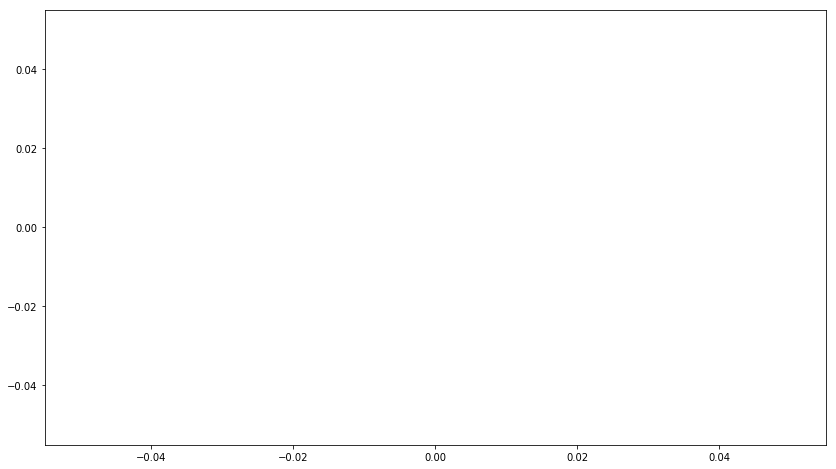

In [53]:
fig5 = plt.figure(figsize=(14, 8))
plt.plot()

domestic_gross = top_domestic_gross[top_domestic_gross['domestic_gross'], 'movie'].head(10)
domestic_gross.plot(kind='bar', title='Top 10 Domestically Highest Grossing Movies of All-time')

plt.xlabel('Movie')
plt.ylabel('Domestic gross')
plt.show()

fig5.savefig("top ten domestic gross.png")
plt.clf()

In [51]:
# sort by worldwide gross
top_worldwide_gross = df.sort_values(by=['worldwide_gross'], ascending = False)
top_worldwide_gross.head(10)

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
878,Avatar,Horror,93.0,6.1,43,2009-12-18,2009,2009-12,425000000.0,760507625.0,2.776345e+09
1759,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0,8.5,670926,2018-04-27,2018,2018-04,300000000.0,678815482.0,2.048134e+09
5,Jurassic World,"Action,Adventure,Sci-Fi",124.0,7.0,539338,2015-06-12,2015,2015-06,215000000.0,652270625.0,1.648855e+09
1473,Furious 7,"Action,Crime,Thriller",137.0,7.2,335074,2015-04-03,2015,2015-04,190000000.0,353007020.0,1.518723e+09
92,The Avengers,"Action,Adventure,Sci-Fi",143.0,8.1,1183655,2012-05-04,2012,2012-05,225000000.0,623279547.0,1.517936e+09
1325,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",141.0,7.3,665594,2015-05-01,2015,2015-05,330600000.0,459005868.0,1.403014e+09
924,Black Panther,"Action,Adventure,Sci-Fi",134.0,7.3,516148,2018-02-16,2018,2018-02,200000000.0,700059566.0,1.348258e+09
1860,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",128.0,6.2,219125,2018-06-22,2018,2018-06,170000000.0,417719760.0,1.305773e+09
379,Frozen,"Adventure,Drama,Sport",93.0,6.2,62311,2013-11-22,2013,2013-11,150000000.0,400738009.0,1.272470e+09
1269,Beauty and the Beast,"Drama,Fantasy,Romance",112.0,6.4,18100,2017-03-17,2017,2017-03,160000000.0,504014165.0,1.259200e+09


In [52]:
# sort by both domestic and worldwide gross
top_domestic_worldwide_gross = df.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)
top_domestic_worldwide_gross.head(10)

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
878,Avatar,Horror,93.0,6.1,43,2009-12-18,2009,2009-12,425000000.0,760507625.0,2.776345e+09
924,Black Panther,"Action,Adventure,Sci-Fi",134.0,7.3,516148,2018-02-16,2018,2018-02,200000000.0,700059566.0,1.348258e+09
1759,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0,8.5,670926,2018-04-27,2018,2018-04,300000000.0,678815482.0,2.048134e+09
5,Jurassic World,"Action,Adventure,Sci-Fi",124.0,7.0,539338,2015-06-12,2015,2015-06,215000000.0,652270625.0,1.648855e+09
92,The Avengers,"Action,Adventure,Sci-Fi",143.0,8.1,1183655,2012-05-04,2012,2012-05,225000000.0,623279547.0,1.517936e+09
1659,Incredibles 2,"Action,Adventure,Animation",118.0,7.7,203510,2018-06-15,2018,2018-06,200000000.0,608581744.0,1.242521e+09
1691,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",133.0,7.8,478592,2016-12-16,2016,2016-12,200000000.0,532177324.0,1.049103e+09
1269,Beauty and the Beast,"Drama,Fantasy,Romance",112.0,6.4,18100,2017-03-17,2017,2017-03,160000000.0,504014165.0,1.259200e+09
1239,Finding Dory,"Adventure,Animation,Comedy",97.0,7.3,213542,2016-06-17,2016,2016-06,200000000.0,486295561.0,1.021215e+09
1325,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",141.0,7.3,665594,2015-05-01,2015,2015-05,330600000.0,459005868.0,1.403014e+09


In [53]:
top_domestic_gross['movie'].head(10)

878                           Avatar
924                    Black Panther
1759          Avengers: Infinity War
5                     Jurassic World
92                      The Avengers
1659                   Incredibles 2
1691    Rogue One: A Star Wars Story
1269            Beauty and the Beast
1239                    Finding Dory
1325         Avengers: Age of Ultron
Name: movie, dtype: object

In [54]:
top_domestic_worldwide_gross['movie'].head(10)

878                           Avatar
924                    Black Panther
1759          Avengers: Infinity War
5                     Jurassic World
92                      The Avengers
1659                   Incredibles 2
1691    Rogue One: A Star Wars Story
1269            Beauty and the Beast
1239                    Finding Dory
1325         Avengers: Age of Ultron
Name: movie, dtype: object

In [55]:
top_worldwide_gross['movie'].head(10)

878                             Avatar
1759            Avengers: Infinity War
5                       Jurassic World
1473                         Furious 7
92                        The Avengers
1325           Avengers: Age of Ultron
924                      Black Panther
1860    Jurassic World: Fallen Kingdom
379                             Frozen
1269              Beauty and the Beast
Name: movie, dtype: object

In [56]:
top_domestic_worldwide_gross.genres.value_counts()

Drama                              129
Comedy                              71
Adventure,Animation,Comedy          67
Comedy,Drama                        66
Comedy,Drama,Romance                64
Documentary                         60
Action,Adventure,Sci-Fi             55
Drama,Romance                       51
Action,Crime,Drama                  46
Comedy,Romance                      44
Drama,Thriller                      34
Horror,Mystery,Thriller             34
Horror                              34
Action,Adventure,Fantasy            34
Horror,Thriller                     34
Action,Comedy,Crime                 30
Action,Adventure,Comedy             28
Action,Adventure,Drama              28
Crime,Drama,Thriller                27
Action,Crime,Thriller               23
Biography,Drama,History             23
Crime,Drama                         22
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama                     19
Comedy,Crime,Drama       

In [57]:
top_domestic_gross.genres.value_counts()

Drama                              129
Comedy                              71
Adventure,Animation,Comedy          67
Comedy,Drama                        66
Comedy,Drama,Romance                64
Documentary                         60
Action,Adventure,Sci-Fi             55
Drama,Romance                       51
Action,Crime,Drama                  46
Comedy,Romance                      44
Drama,Thriller                      34
Horror,Mystery,Thriller             34
Horror                              34
Action,Adventure,Fantasy            34
Horror,Thriller                     34
Action,Comedy,Crime                 30
Action,Adventure,Comedy             28
Action,Adventure,Drama              28
Crime,Drama,Thriller                27
Action,Crime,Thriller               23
Biography,Drama,History             23
Crime,Drama                         22
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama                     19
Comedy,Crime,Drama       

In [58]:
top_worldwide_gross.genres.value_counts()

Drama                              129
Comedy                              71
Adventure,Animation,Comedy          67
Comedy,Drama                        66
Comedy,Drama,Romance                64
Documentary                         60
Action,Adventure,Sci-Fi             55
Drama,Romance                       51
Action,Crime,Drama                  46
Comedy,Romance                      44
Horror,Thriller                     34
Horror                              34
Drama,Thriller                      34
Horror,Mystery,Thriller             34
Action,Adventure,Fantasy            34
Action,Comedy,Crime                 30
Action,Adventure,Comedy             28
Action,Adventure,Drama              28
Crime,Drama,Thriller                27
Action,Crime,Thriller               23
Biography,Drama,History             23
Crime,Drama                         22
Action,Thriller                     22
Biography,Comedy,Drama              20
Biography,Drama                     19
Comedy,Crime,Drama       

In [59]:
top_domestic_worldwide_gross.genres.head(10)  ## dont do this, avatar is not a horror movie....

878                         Horror
924        Action,Adventure,Sci-Fi
1759       Action,Adventure,Sci-Fi
5          Action,Adventure,Sci-Fi
92         Action,Adventure,Sci-Fi
1659    Action,Adventure,Animation
1691       Action,Adventure,Sci-Fi
1269         Drama,Fantasy,Romance
1239    Adventure,Animation,Comedy
1325       Action,Adventure,Sci-Fi
Name: genres, dtype: object

## Movie duration

In [60]:
df.duration.describe()

count    1986.000000
mean      104.218026
std        18.622629
min         5.000000
25%        92.000000
50%       102.000000
75%       114.000000
max       180.000000
Name: duration, dtype: float64

In [61]:
movie_duration = df.sort_values('duration')

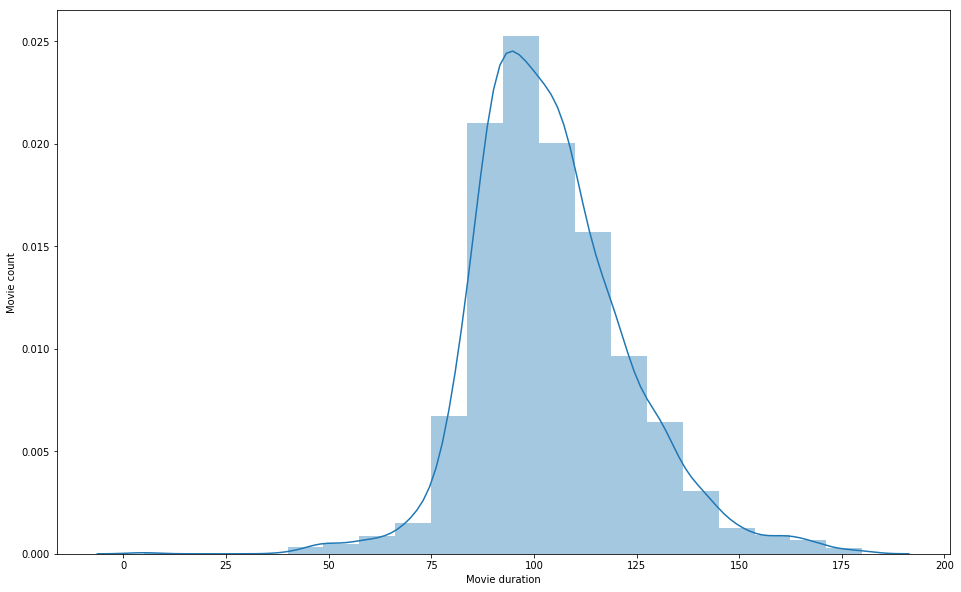

<Figure size 432x288 with 0 Axes>

In [62]:
fig3 = plt.figure(figsize=(16, 10))
plt.plot()

sns.distplot( df['duration'], bins=20)

plt.xlabel('Movie duration')
plt.ylabel('Movie count')
plt.show()

fig3.savefig("movie duration.png")
plt.clf()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2031
Data columns (total 11 columns):
movie                 1986 non-null object
genres                1986 non-null object
duration              1986 non-null float64
averagerating         1986 non-null float64
numvotes              1986 non-null int64
release_date          1986 non-null datetime64[ns]
release_year          1986 non-null period[A-DEC]
release_month_year    1986 non-null period[M]
budget                1986 non-null float64
domestic_gross        1986 non-null float64
worldwide_gross       1986 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 266.2+ KB


In [64]:
# print(‘Avg. star rating for movies 2 hours or longer: ‘, movies[movies[‘duration’] >= 120][‘star_rating’].mean(), 
#  ‘\nAvg. star rating for movies shorter than 2 hours: ‘, movies[movies[‘duration’] < 120][‘star_rating’].mean())

## Release year and number of movies

In [65]:
df['release_year'] = df['release_year'].map(lambda x:str(x))

In [66]:
movie_by_year = df.groupby(['release_year']).movie.count()

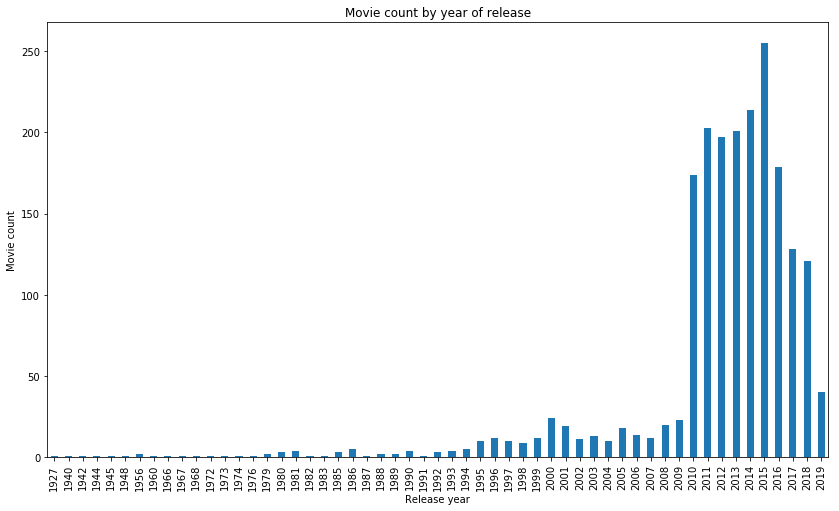

<Figure size 432x288 with 0 Axes>

In [67]:
fig4 = plt.figure(figsize=(14, 8))
plt.plot()

movie_by_year.plot(kind='bar', title='Movie count by year of release')

plt.xlabel('Release year')
plt.ylabel('Movie count')
plt.show()

fig4.savefig("movie count by release year.png")
plt.clf()

## Genres

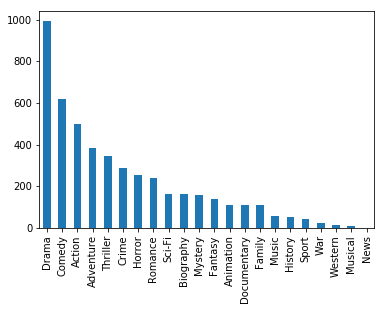

In [68]:
Glist = []
for x in df.genres.str.split(','):
    Glist.extend(x)
    
pd.value_counts(Glist).plot(kind = 'bar')

In [1]:
Glist.value_counts()

NameError: name 'Glist' is not defined

In [ ]:
ax = sns.barplot(x='totalCount', y='name', data=df)
ax.set_xlabel('Total Movie Count by Genres')

In [69]:
df_genres = df

In [70]:
df_genres = df_genres.join(df_genres.pop('genres').str.get_dummies(','))

In [71]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2031
Data columns (total 32 columns):
movie                 1986 non-null object
duration              1986 non-null float64
averagerating         1986 non-null float64
numvotes              1986 non-null int64
release_date          1986 non-null datetime64[ns]
release_year          1986 non-null object
release_month_year    1986 non-null period[M]
budget                1986 non-null float64
domestic_gross        1986 non-null float64
worldwide_gross       1986 non-null float64
Action                1986 non-null int64
Adventure             1986 non-null int64
Animation             1986 non-null int64
Biography             1986 non-null int64
Comedy                1986 non-null int64
Crime                 1986 non-null int64
Documentary           1986 non-null int64
Drama                 1986 non-null int64
Family                1986 non-null int64
Fantasy               1986 non-null int64
History               1986 n

In [72]:
df_genres.head()

,movie,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Foodfight!,91.0,1.9,8248,2012-12-31,2012,2012-12,45000000.0,0.0,7.370600e+04,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,On the Road,124.0,6.1,37886,2013-03-22,2013,2013-03,25000000.0,720828.0,9.313302e+06,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,The Secret Life of Walter Mitty,114.0,7.3,275300,2013-12-25,2013,2013-12,91000000.0,58236838.0,1.878612e+08,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A Walk Among the Tombstones,114.0,6.5,105116,2014-09-19,2014,2014-09,28000000.0,26017685.0,6.210859e+07,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Jurassic World,124.0,7.0,539338,2015-06-12,2015,2015-06,215000000.0,652270625.0,1.648855e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
df_genres.describe()

,duration,averagerating,numvotes,budget,domestic_gross,worldwide_gross,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1.986000e+03,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,104.218026,6.225629,8.676225e+04,3.792150e+07,4.750662e+07,1.165570e+08,0.252266,0.194361,0.056898,0.081571,0.311178,0.144512,0.055891,0.500504,0.055388,0.069486,0.027694,0.128902,0.030211,0.006042,0.079053,0.000504,0.121853,0.082578,0.021652,0.173212,0.013092,0.006546
std,18.622629,1.129870,1.498701e+05,5.216506e+07,7.916653e+07,2.190042e+08,0.434422,0.395807,0.231707,0.273779,0.463092,0.351696,0.229769,0.500126,0.228793,0.254344,0.164136,0.335176,0.171212,0.077517,0.269890,0.022439,0.327198,0.275313,0.145580,0.378526,0.113696,0.080661
min,5.000000,1.600000,5.000000e+00,1.400000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,5.600000,1.374000e+03,5.000000e+06,6.210385e+05,2.512734e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102.000000,6.300000,3.038900e+04,1.900000e+07,1.918510e+07,3.430229e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,114.000000,7.000000,1.024432e+05,4.500000e+07,5.804744e+07,1.192061e+08,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,180.000000,9.200000,1.841066e+06,4.250000e+08,7.605076e+08,2.776345e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df_genres_subset = df_genres

In [77]:
df_genres_subset = df_genres.iloc[:, 10:]

In [78]:
df_genres_subset.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [81]:
df_genres_subset.sum().sort_values(ascending = False)

Drama          994
Comedy         618
Action         501
Adventure      386
Thriller       344
Crime          287
Horror         256
Romance        242
Sci-Fi         164
Biography      162
Mystery        157
Fantasy        138
Animation      113
Documentary    111
Family         110
Music           60
History         55
Sport           43
War             26
Western         13
Musical         12
News             1
dtype: int64

In [84]:
df_genres[['duration', 'Drama']].groupby('Drama').mean()

,duration
Drama,
0,100.621976
1,107.806841


In [85]:
df_genres[['averagerating', 'Drama']].groupby('Drama').mean()

,averagerating
Drama,
0,6.011895
1,6.438934


In [70]:
# df_genres = df.join(df.pop('genres').str.get_dummies(','))

In [68]:
# genres = movies[‘genre’].value_counts()[movies[‘genre’].value_counts() > 10].index
# movies[movies[‘genre’].isin(genres)].groupby(‘genre’)[‘star_rating’].mean()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2031
Data columns (total 11 columns):
movie                 1986 non-null object
genres                1986 non-null object
duration              1986 non-null float64
averagerating         1986 non-null float64
numvotes              1986 non-null int64
release_date          1986 non-null datetime64[ns]
release_year          1986 non-null object
release_month_year    1986 non-null period[M]
budget                1986 non-null float64
domestic_gross        1986 non-null float64
worldwide_gross       1986 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3), period[M](1)
memory usage: 266.2+ KB


In [ ]:
df.groupby(['gen'])

In [42]:
# df2

In [ ]:
df2 = df[~df['runtime_minutes'].isna()]

In [ ]:
df2.info()

In [ ]:
df2 = df2[~df2['genres'].isna()]

In [ ]:
df2.info()

In [ ]:
df2.runtime_minutes.max()

In [ ]:
df2.runtime_minutes.describe()

In [ ]:
### df['amount_by_source'] = df.groupby(['source'])['amount'].transform('sum')